In [1]:
# !pip uninstall tensorflow tensorflow-tensorboard tensorflow-estimator
!pip install gdown
!pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.47.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-14.0.1-py2.py3-none-manylinux1_x86_64.whl (14.5 MB)
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached google_auth-2.9.1-py2.py3-none-any.whl (167 kB)
  Using cached cachetools-5.2.0-py3-

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
df = pd.read_csv(
  "/home/jovyan/work/model/training_data/rf_training_data1.csv", 
  parse_dates=['read_date'], 
  index_col="read_date"
)

In [4]:
#print(df)

            sl_read1     bl_meter1  bl_ahd1  mean_temp1     bl_meter2  \
read_date                                                               
2009-01-11     0.189  GW967137.1.1  252.959      19.683  GW967137.2.2   
2009-01-22     0.188  GW967137.1.1  252.925      19.700  GW967137.2.2   
2009-01-23     0.189  GW967137.1.1  252.934      19.700  GW967137.2.2   
2009-01-24     0.189  GW967137.1.1  252.934      19.700  GW967137.2.2   
2009-01-26     0.191  GW967137.1.1  252.922      19.700  GW967137.2.2   
...              ...           ...      ...         ...           ...   
2022-06-10     0.216  GW967137.1.1  252.973      20.000  GW967137.2.2   
2022-07-12     0.386  GW967137.1.1  253.054      20.000  GW967137.2.2   
2022-07-13     0.358  GW967137.1.1  253.041      20.000  GW967137.2.2   
2022-07-14     0.337  GW967137.1.1  253.026      20.000  GW967137.2.2   
2022-07-20     0.245  GW967137.1.1  252.976      20.000  GW967137.2.2   

            bl_ahd2  mean_temp2     bl_meter3  bl_

In [5]:
df = df.drop(['bl_meter1','bl_meter2','bl_meter3','bl_ahd3','mean_temp3','bl_meter4','bl_ahd4','mean_temp4','sl_meter','rf_meter',
             ],axis=1)

In [6]:
df.shape

(1444, 10)

In [7]:
df.head()

,sl_read1,bl_ahd1,mean_temp1,bl_ahd2,mean_temp2,rf_read1,rf_MA,rf_bin,et_read1,sr_read1
read_date,,,,,,,,,,
2009-01-11,0.189,252.959,19.683,251.003,20.500,1.4,54038,7.5,30.50,0.94
2009-01-22,0.188,252.925,19.700,251.003,20.433,85.8,54038,2.7,8.70,8.58
2009-01-23,0.189,252.934,19.700,251.012,20.431,65.6,54038,6.3,24.01,15.14
2009-01-24,0.189,252.934,19.700,251.016,20.417,0.8,54038,8.5,27.56,15.22
2009-01-26,0.191,252.922,19.700,251.003,20.431,21.4,54038,8.1,29.02,17.36


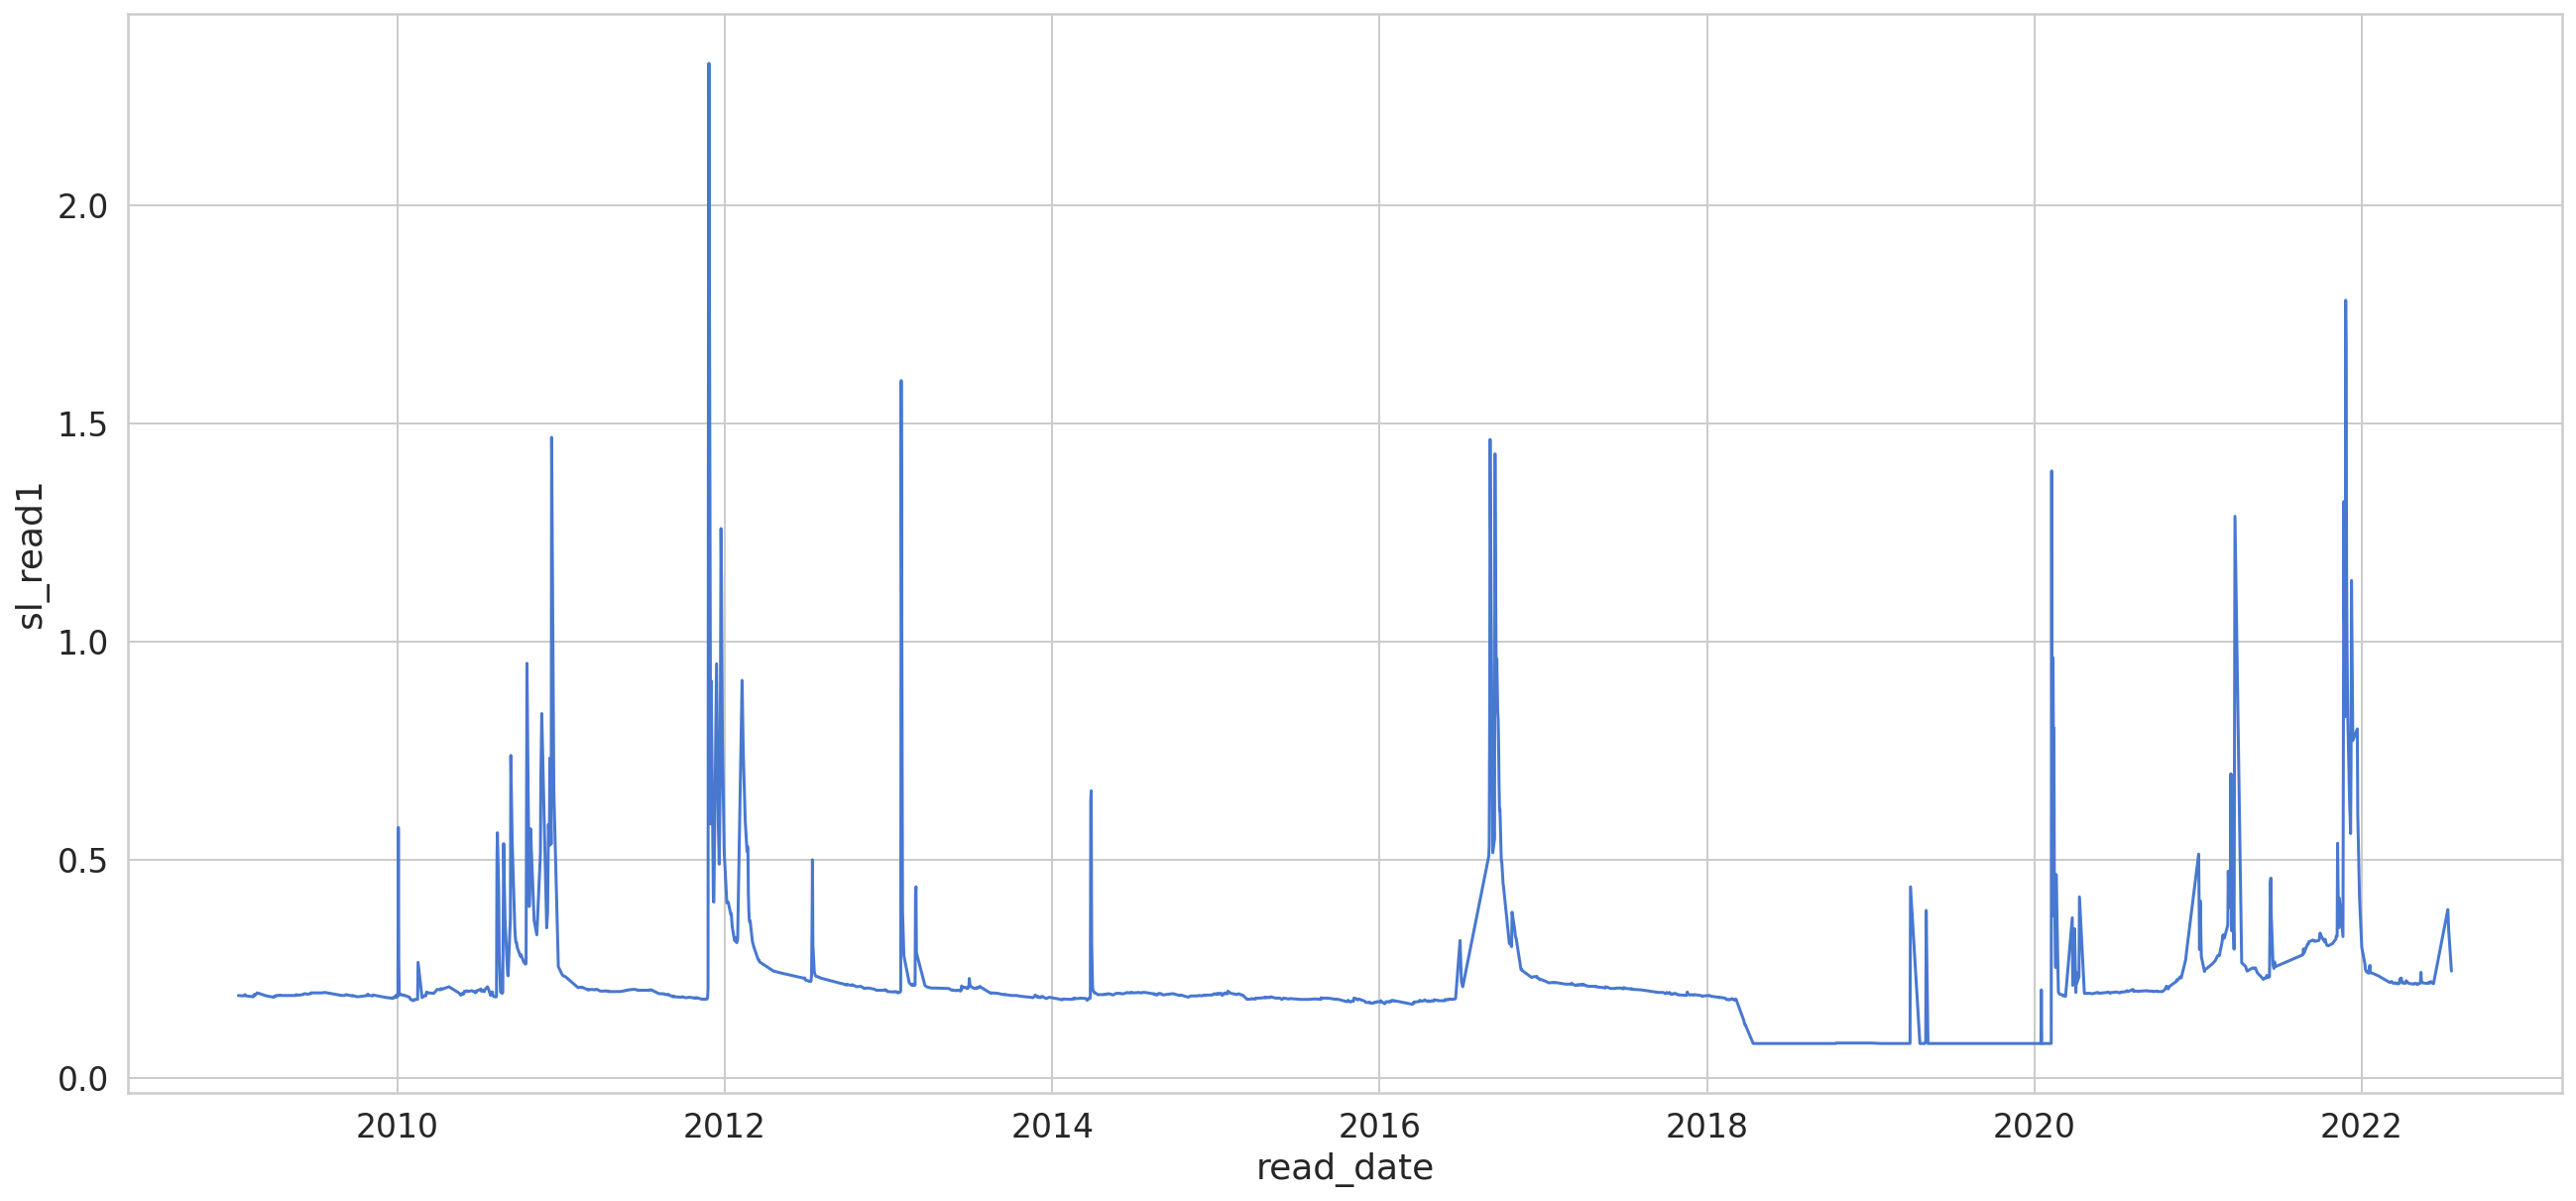

In [8]:
sns.lineplot(x=df.index, y="sl_read1", data=df);

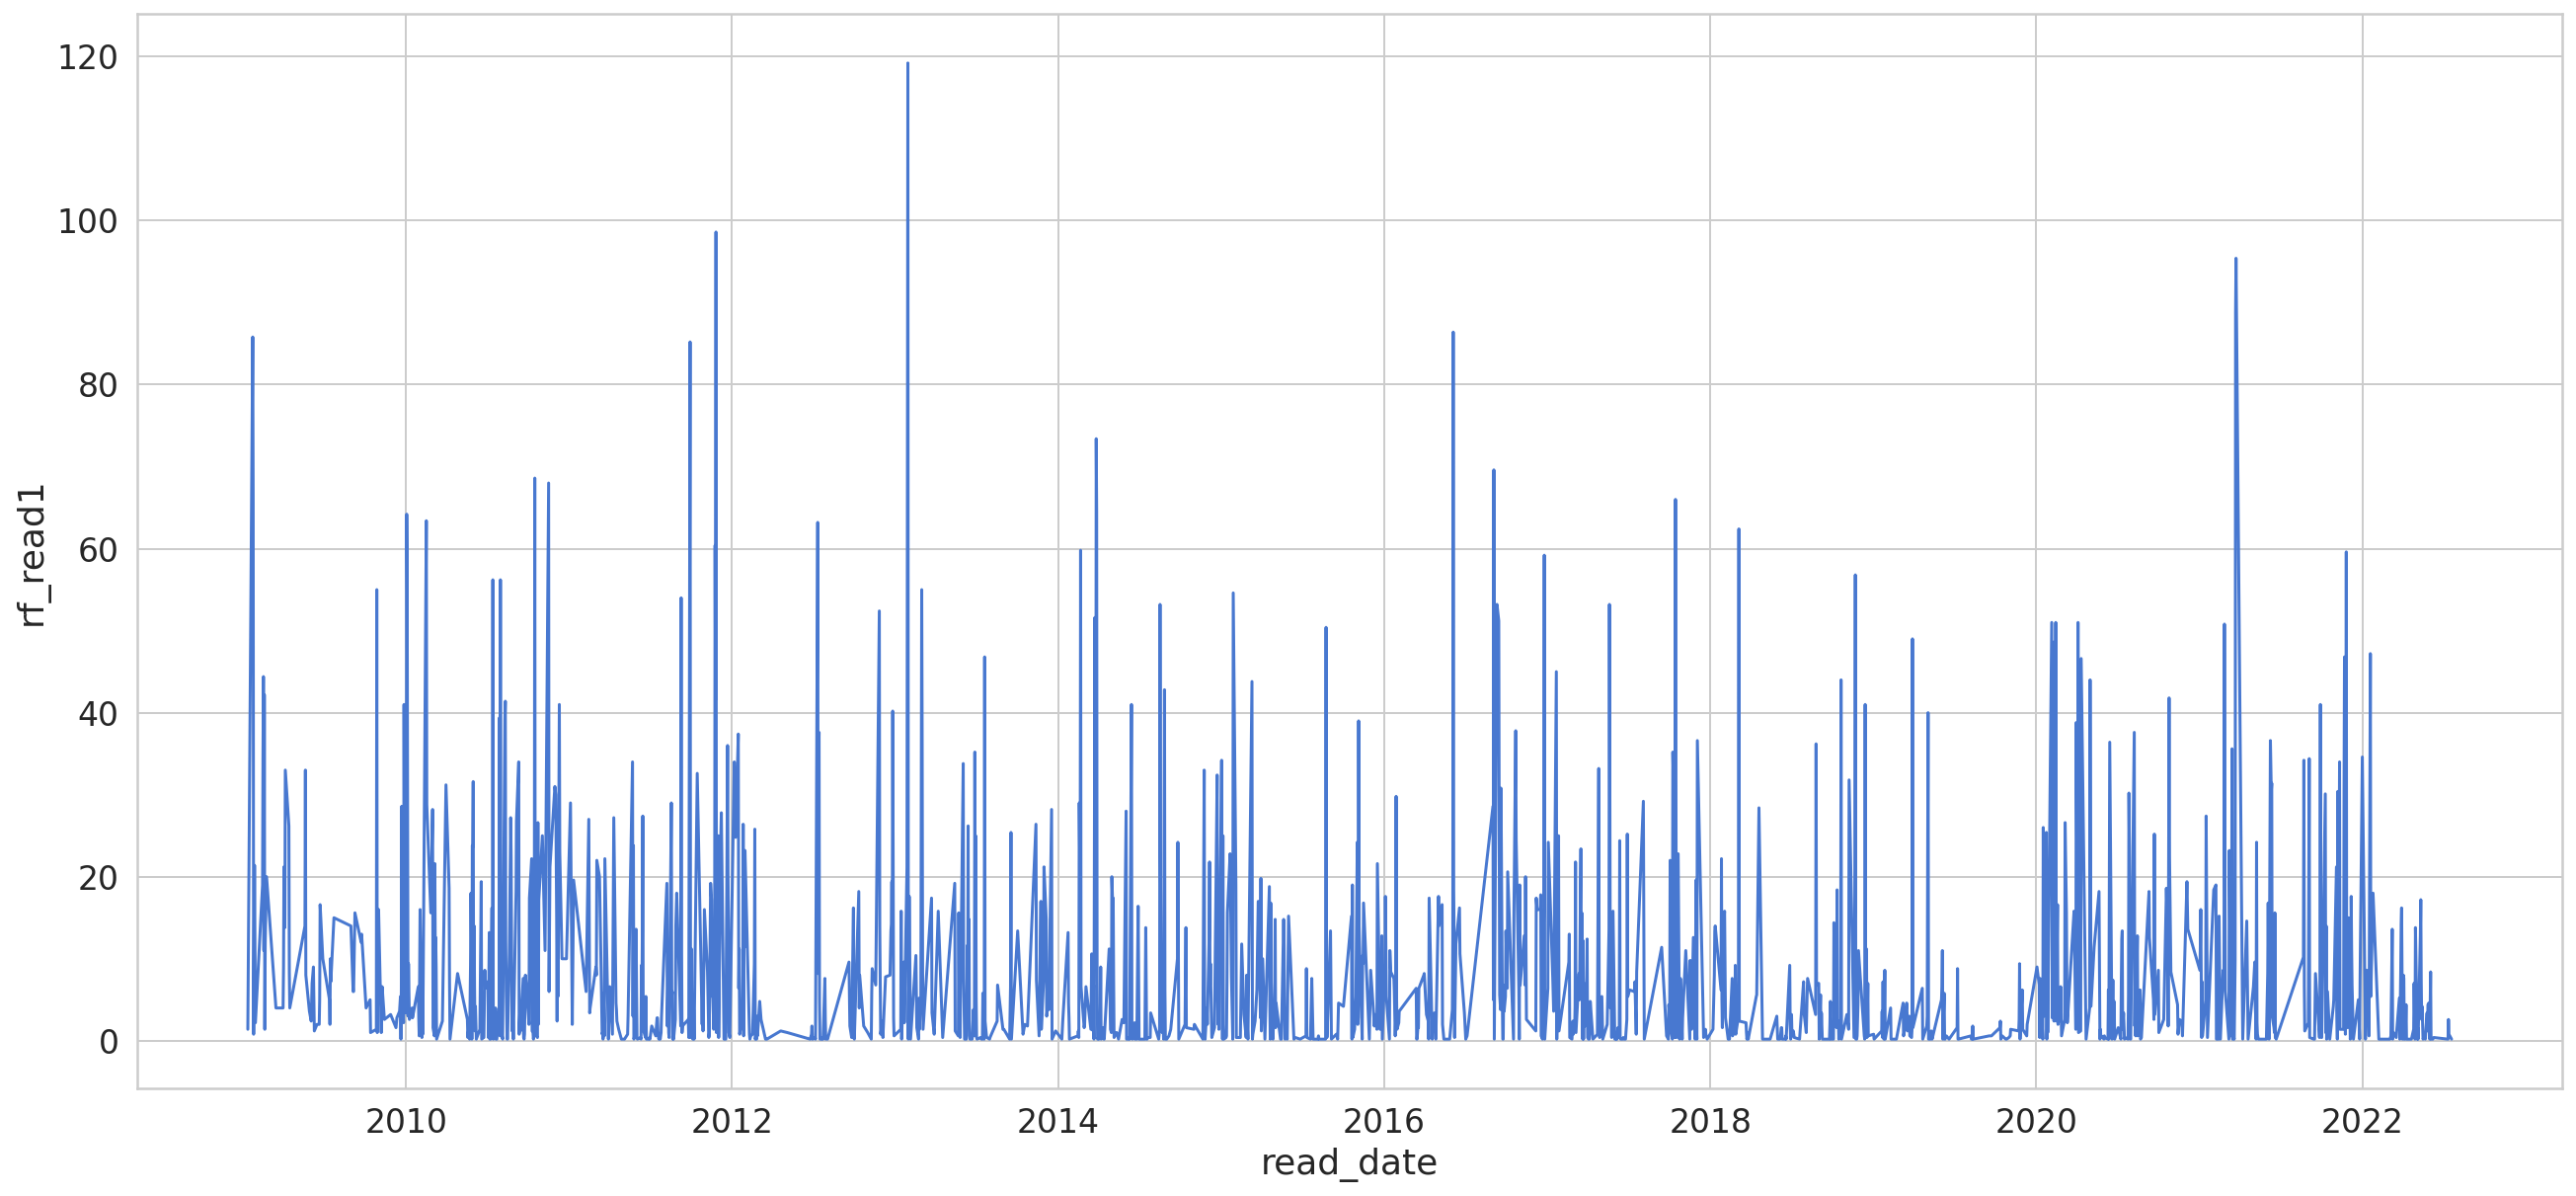

In [9]:
sns.lineplot(x=df.index, y='rf_read1', data=df);

In [10]:

# read_date sl_read1 	bl_ahd1 	mean_temp1 	bl_ahd2 	mean_temp2 	rf_read1
def create_data():
    
    df1 = df.copy()
    df2 = df.copy()
    df2 = df2.drop(['mean_temp1','mean_temp2','rf_read1', 'rf_bin'],axis=1)   #, 'rf_bin' 'rf_MA', 
    
    #df1, df2 = scale_input(df1,df2) 

    return(df1,df2)

In [11]:
def create_train(X,Y):
    train_size = int(len(X) * 0.50)
    X_train, Y_train = X[0:train_size], Y[0:train_size]
#    print(X_train, Y_train)
    return X_train, Y_train

In [12]:
def create_test(X,Y):
    train_size = int(len(X) * 0.50)
    test_size = int(len(X) * 0.75)
    X_test, Y_test = X[train_size:test_size], Y[train_size:test_size]
#    print(X_test, Y_test)
    return X_test, Y_test

In [13]:
def create_model_data(X,Y):
    test_size = int(len(X) * 0.75)
    model_size = int(len(X))
    X_model, Y_model = X[test_size:model_size], Y[test_size:model_size]
#    print(X_test, Y_test)
    return X_model, Y_model

In [14]:
def create_dataset(datax, datay, step):
    X, Y = [], []
    for i in range(len(datax) - step):
        d = i + step  
        X.append(datax[i:d,])
        Y.append(datay[d])
        
    return np.array(X), np.array(Y)

In [15]:
def normalise_dataset(X,Y):

    X, Y = scaler.fit_transform(X), scaler.fit_transform(Y)
    
    return np.array(X), np.array(Y)

In [16]:
time_steps = 50

Xs,Ys = create_data()


Xs_train, Ys_train = create_train(Xs,Ys) 
Xs_test, Ys_test = create_test(Xs,Ys)
Xs_model, Ys_model = create_model_data(Xs,Ys)


# Only normalise the training dataset (?)

Xsn_train, Ysn_train = normalise_dataset(Xs_train,Ys_train)
Xsn_test, Ysn_test = normalise_dataset(Xs_test,Ys_test)
Xsn_model, Ysn_model = normalise_dataset(Xs_model,Ys_model)

# Retain original dataset values as numpy series for visualisations

Xs_train = Xs_train[:(len(Xs_train) - time_steps)].to_numpy()
Ys_train = Ys_train[:(len(Ys_train) - time_steps)].to_numpy()

Xs_test = Xs_test[:(len(Xs_test) - time_steps)].to_numpy()
Ys_test = Ys_test[:(len(Ys_test) - time_steps)].to_numpy()

Xs_model = Xs_model[:(len(Xs_model) - time_steps)].to_numpy()
Ys_model = Ys_model[:(len(Ys_model) - time_steps)].to_numpy()


X_train, Y_train = create_dataset(Xsn_train,Ysn_train, time_steps)
X_test, Y_test = create_dataset(Xsn_test,Ysn_test, time_steps)
X_model, Y_model = create_dataset(Xsn_model,Ysn_model, time_steps)


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_model.shape, Y_model.shape)

(672, 50, 10) (672, 6)
(311, 50, 10) (311, 6)
(311, 50, 10) (311, 6)


In [19]:
#Model 1
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=6))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
#Model 2

model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2)),
model.add(keras.layers.Dense(units=32, activation='relu')),
model.add(keras.layers.Dropout(rate=0.2)),
model.add(keras.layers.Dense(units=16, activation='relu')),
model.add(keras.layers.Dense(units=6, activation='linear')),
model.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
#Model 1 & 2

history = model.fit(
    X_train, Y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
19/19 [==============================] - 4s 56ms/step - loss: 0.1648 - val_loss: 0.0812
Epoch 2/30
19/19 [==============================] - 1s 28ms/step - loss: 0.1000 - val_loss: 0.0630
Epoch 3/30
19/19 [==============================] - 1s 28ms/step - loss: 0.0707 - val_loss: 0.0128
Epoch 4/30
19/19 [==============================] - 1s 30ms/step - loss: 0.0417 - val_loss: 0.0083
Epoch 5/30
19/19 [==============================] - 1s 29ms/step - loss: 0.0336 - val_loss: 0.0069
Epoch 6/30
19/19 [==============================] - 1s 28ms/step - loss: 0.0281 - val_loss: 0.0089
Epoch 7/30
19/19 [==============================] - 1s 28ms/step - loss: 0.0252 - val_loss: 0.0115
Epoch 8/30
19/19 [==============================] - 1s 29ms/step - loss: 0.0229 - val_loss: 0.0117
Epoch 9/30
19/19 [==============================] - 1s 28ms/step - loss: 0.0196 - val_loss: 0.0090
Epoch 10/30
19/19 [==============================] - 1s 28ms/step - loss: 0.0191 - val_loss: 0.0111
Epoch 11/

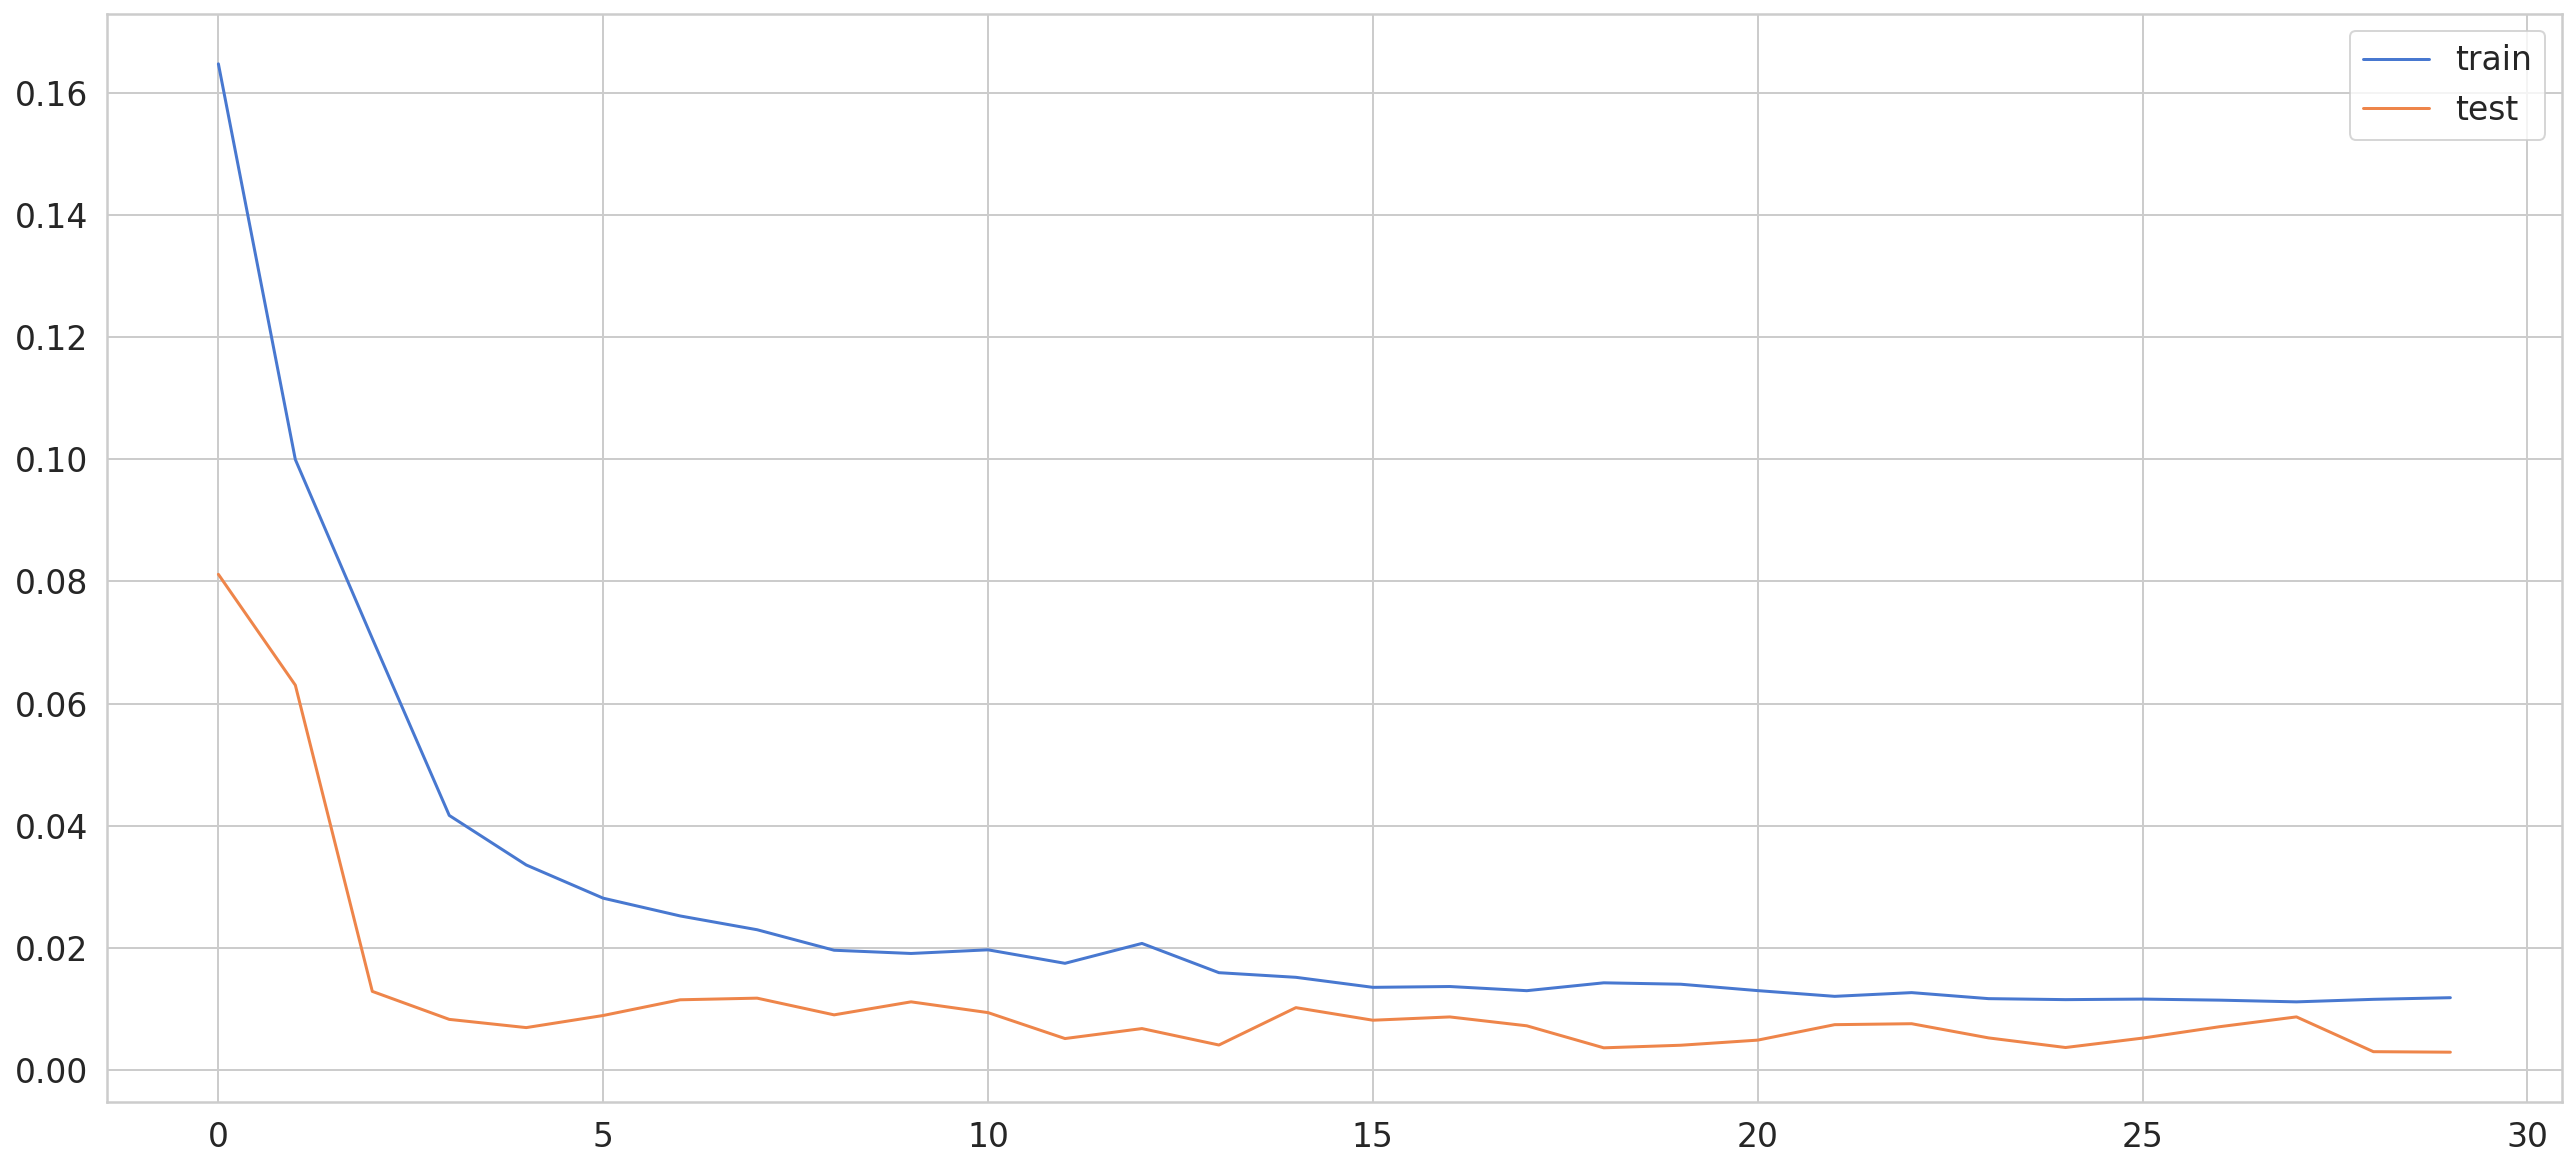

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [31]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 1s 9ms/step


In [32]:
Y_train_inv = scaler.inverse_transform(Y_train)
Y_test_inv = scaler.inverse_transform(Y_test)
Y_pred_inv = scaler.inverse_transform(Y_pred)


In [181]:
#print(Y_pred_inv)
#print(Y_pred_inv.shape)
#print(Y_train_inv)
#print(Y_train_inv.shape)
#print(Ys_test)
#print(Ys_test.shape)
#print(Y_test_inv)
#print(Y_test_inv.shape)
# #2005-12-02     0.295  253.271  251.641

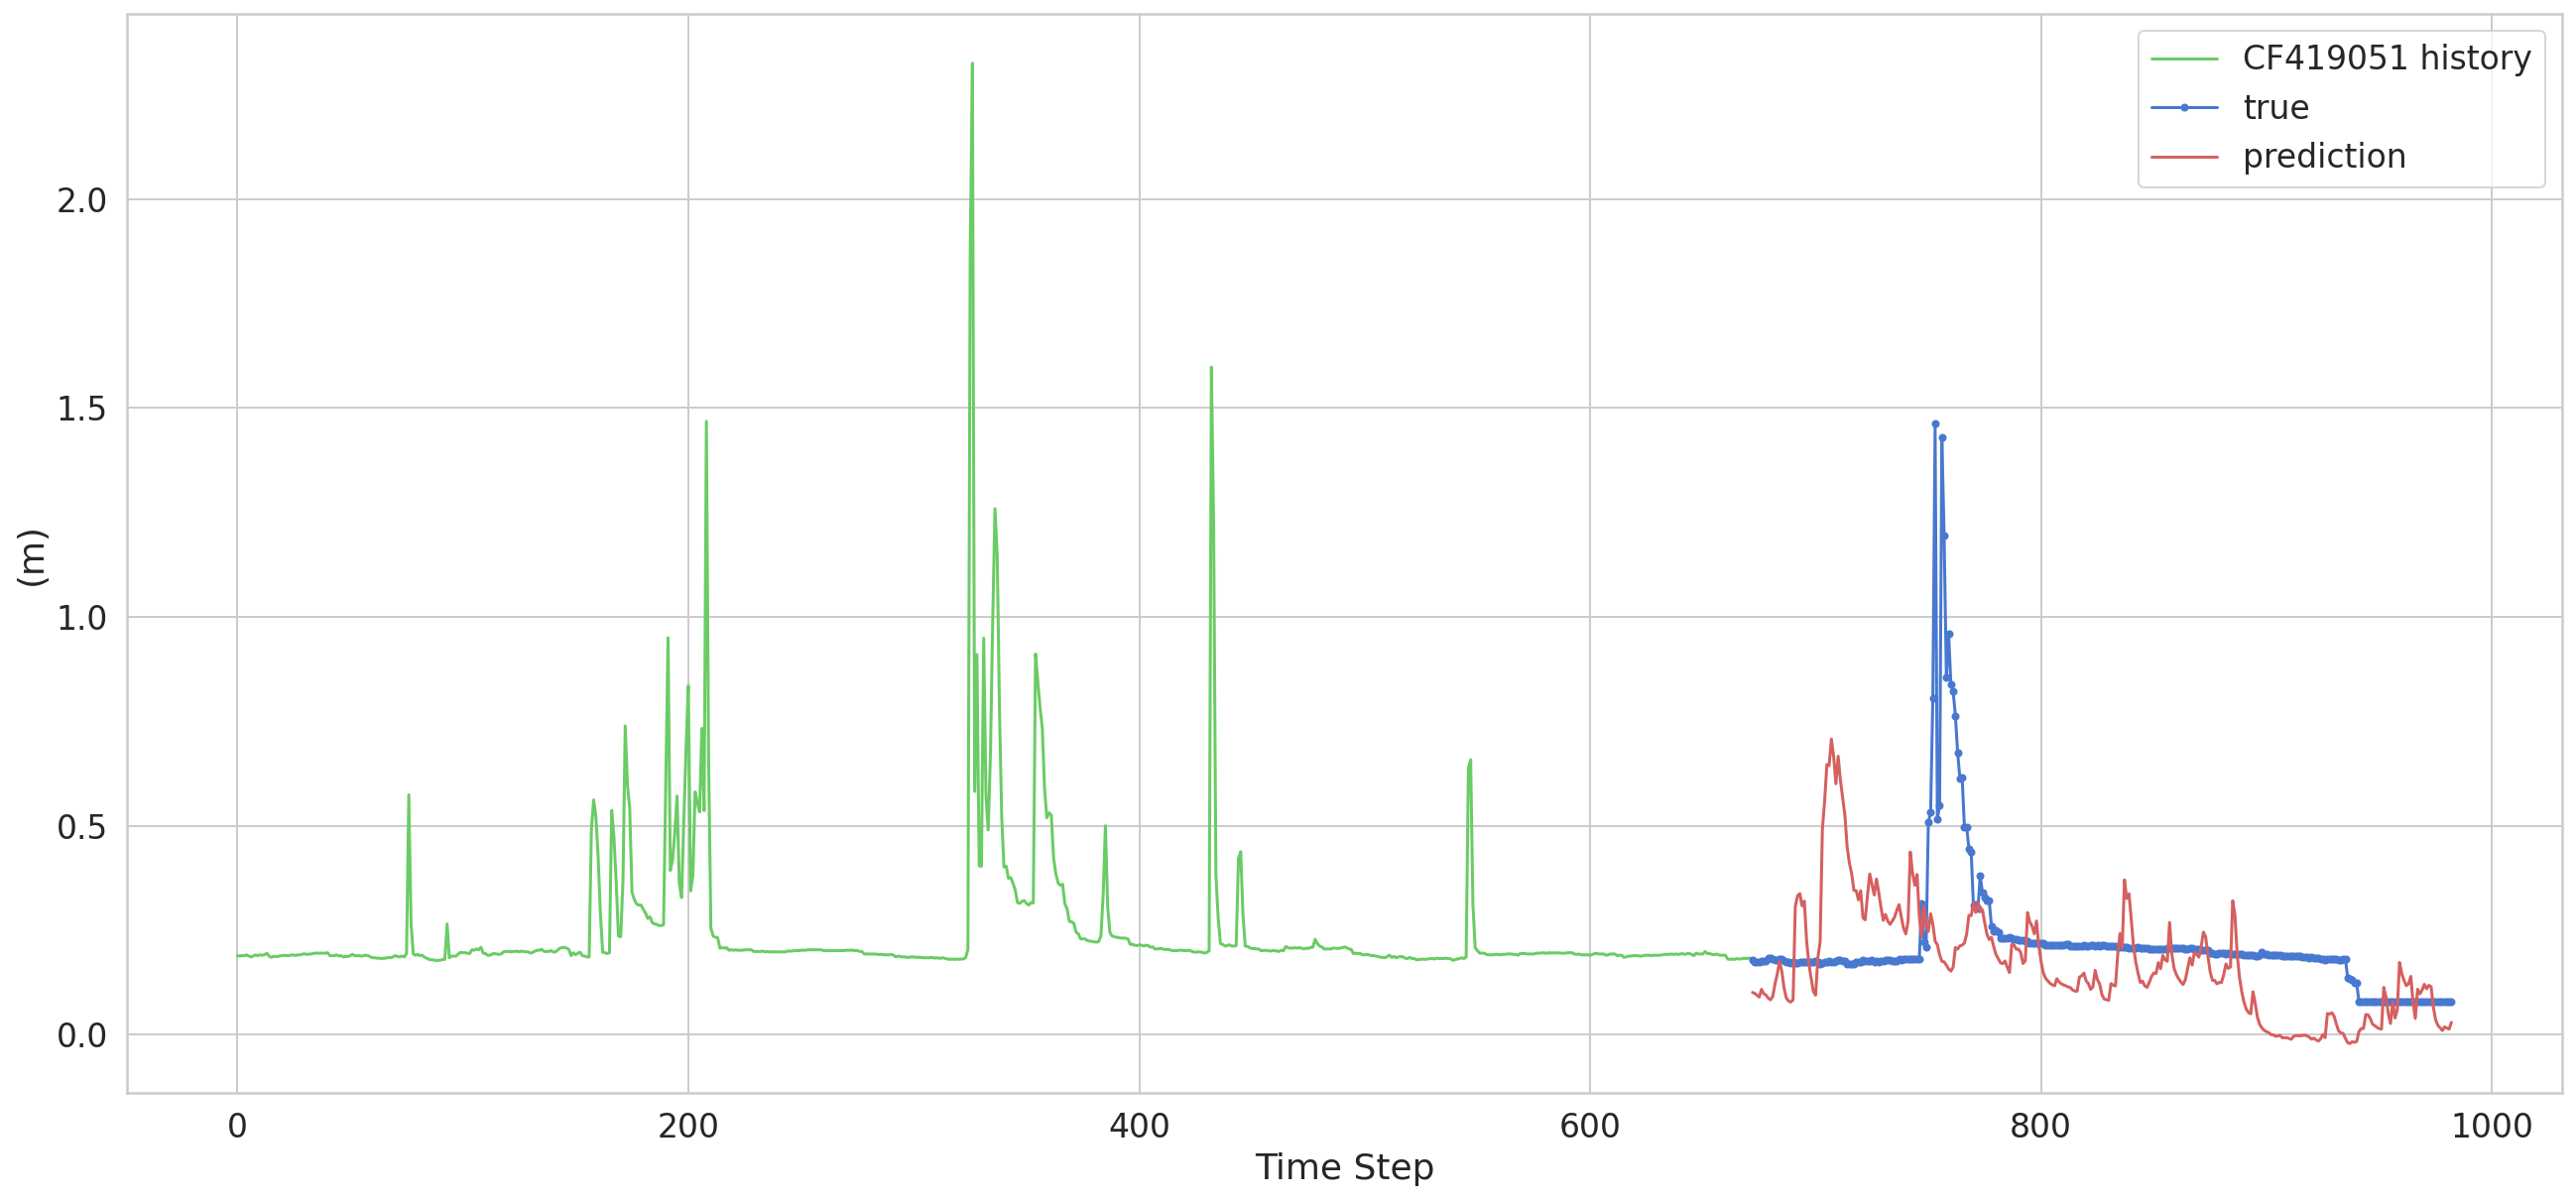

In [33]:
plt.plot(np.arange(0, len(Y_train)), Ys_train[:,0].flatten(), 'g', label="CF419051 history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Ys_test[:,0].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred_inv[:,0].flatten(), 'r', label="prediction")
plt.ylabel('(m)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

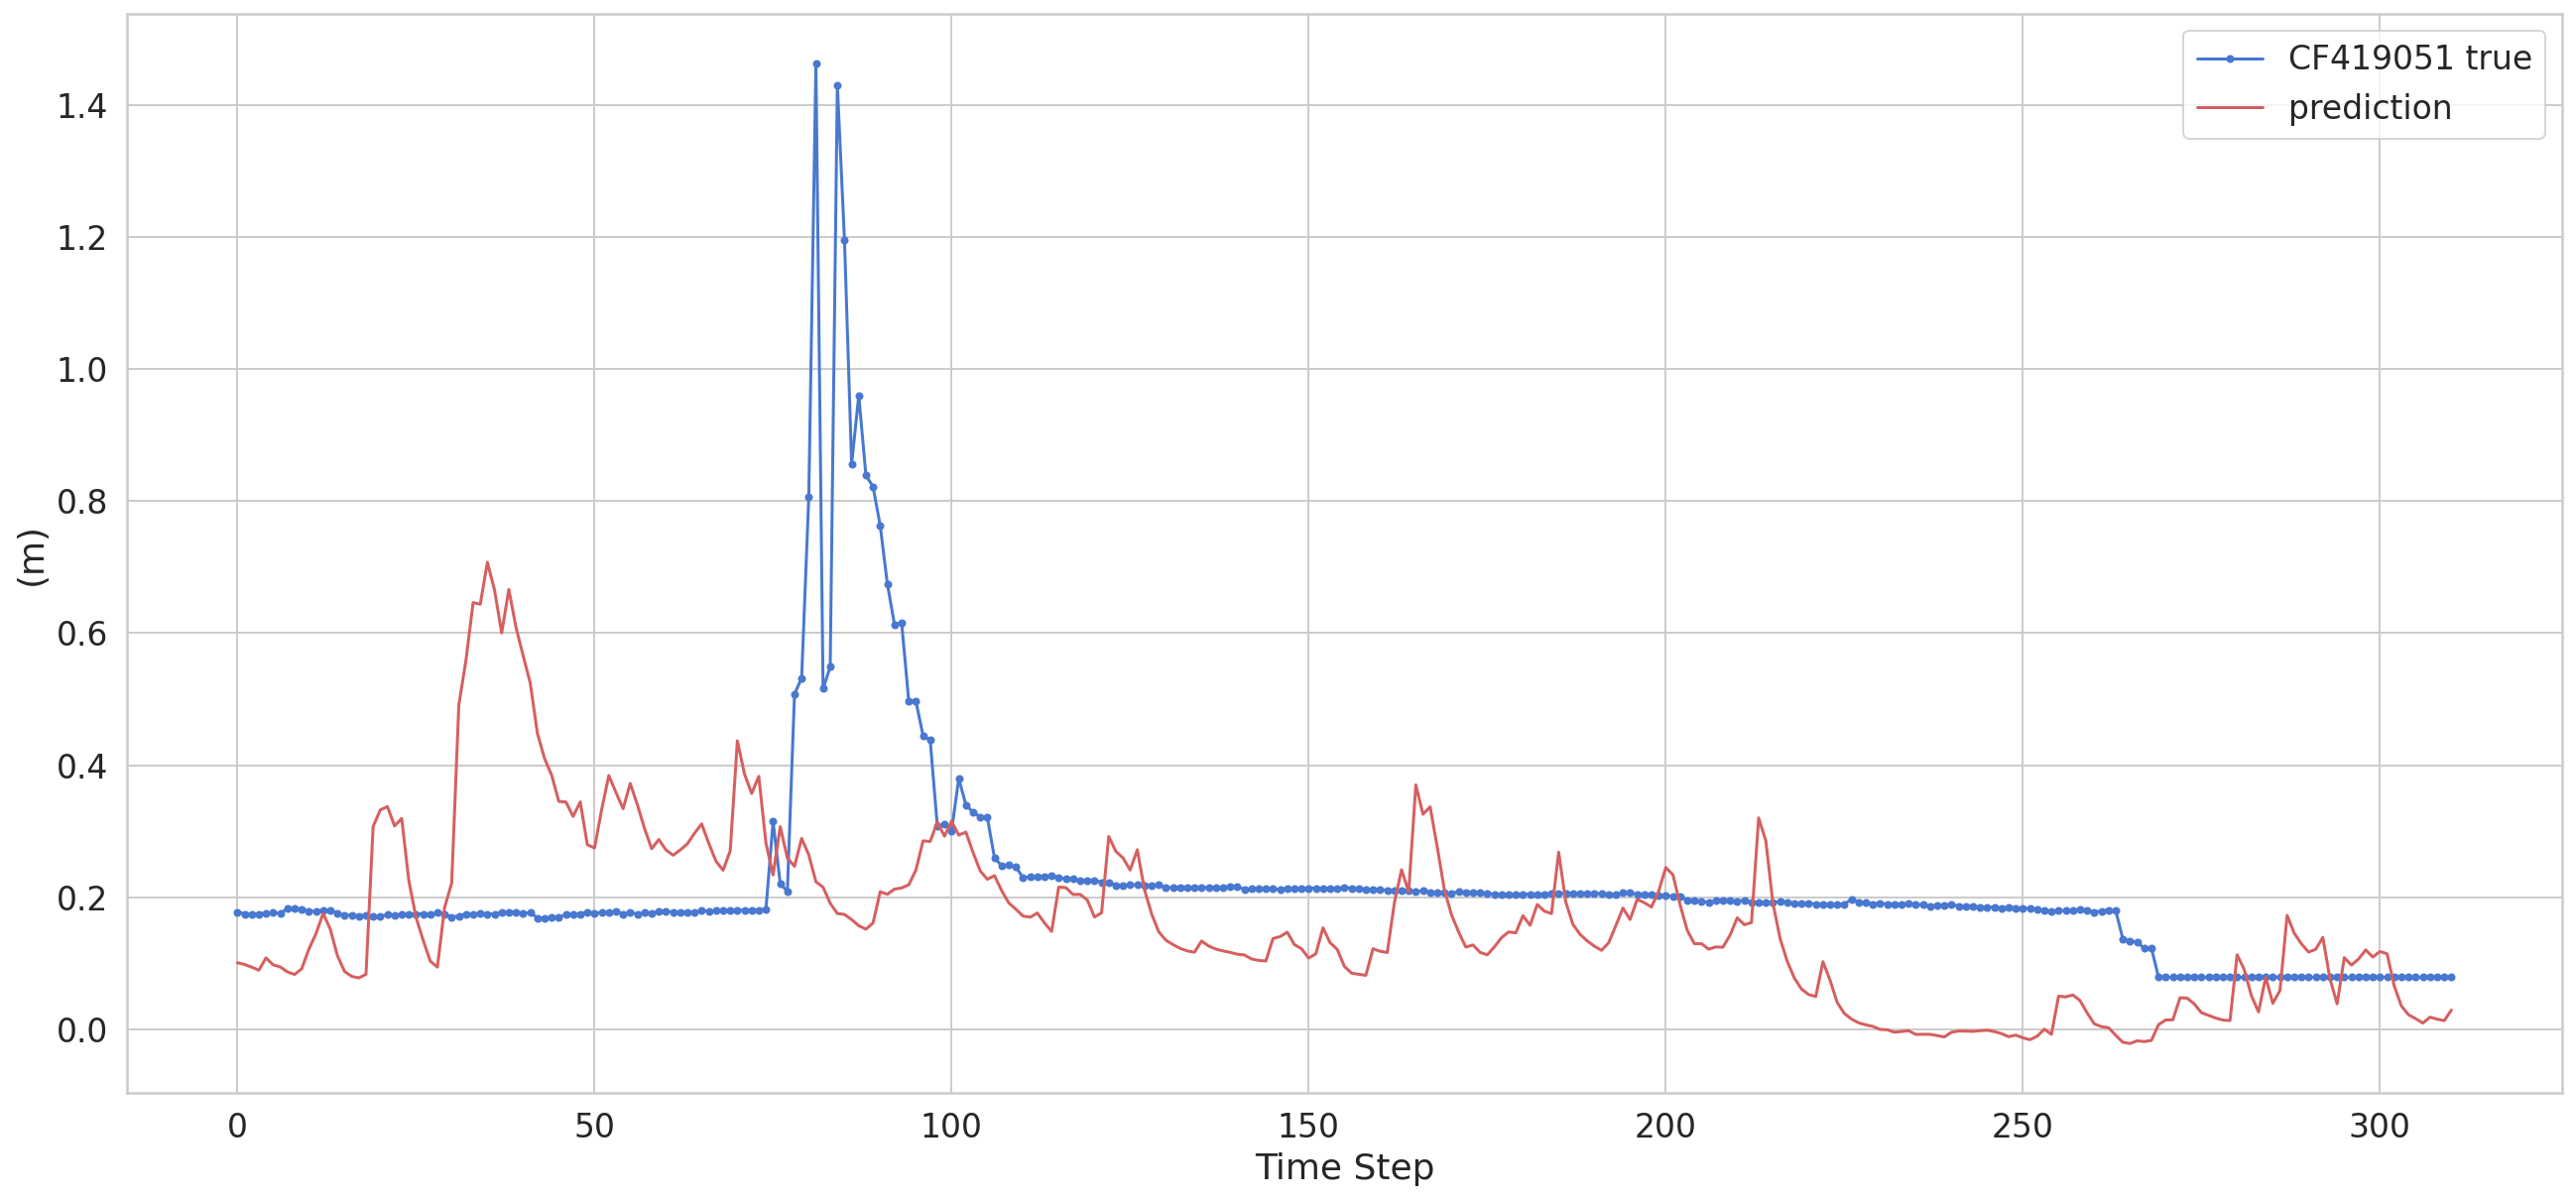

In [34]:
plt.plot(Ys_test[:,0].flatten(), marker='.', label="CF419051 true")
plt.plot(Y_pred_inv[:,0].flatten(), 'r', label="prediction")
plt.ylabel('(m)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

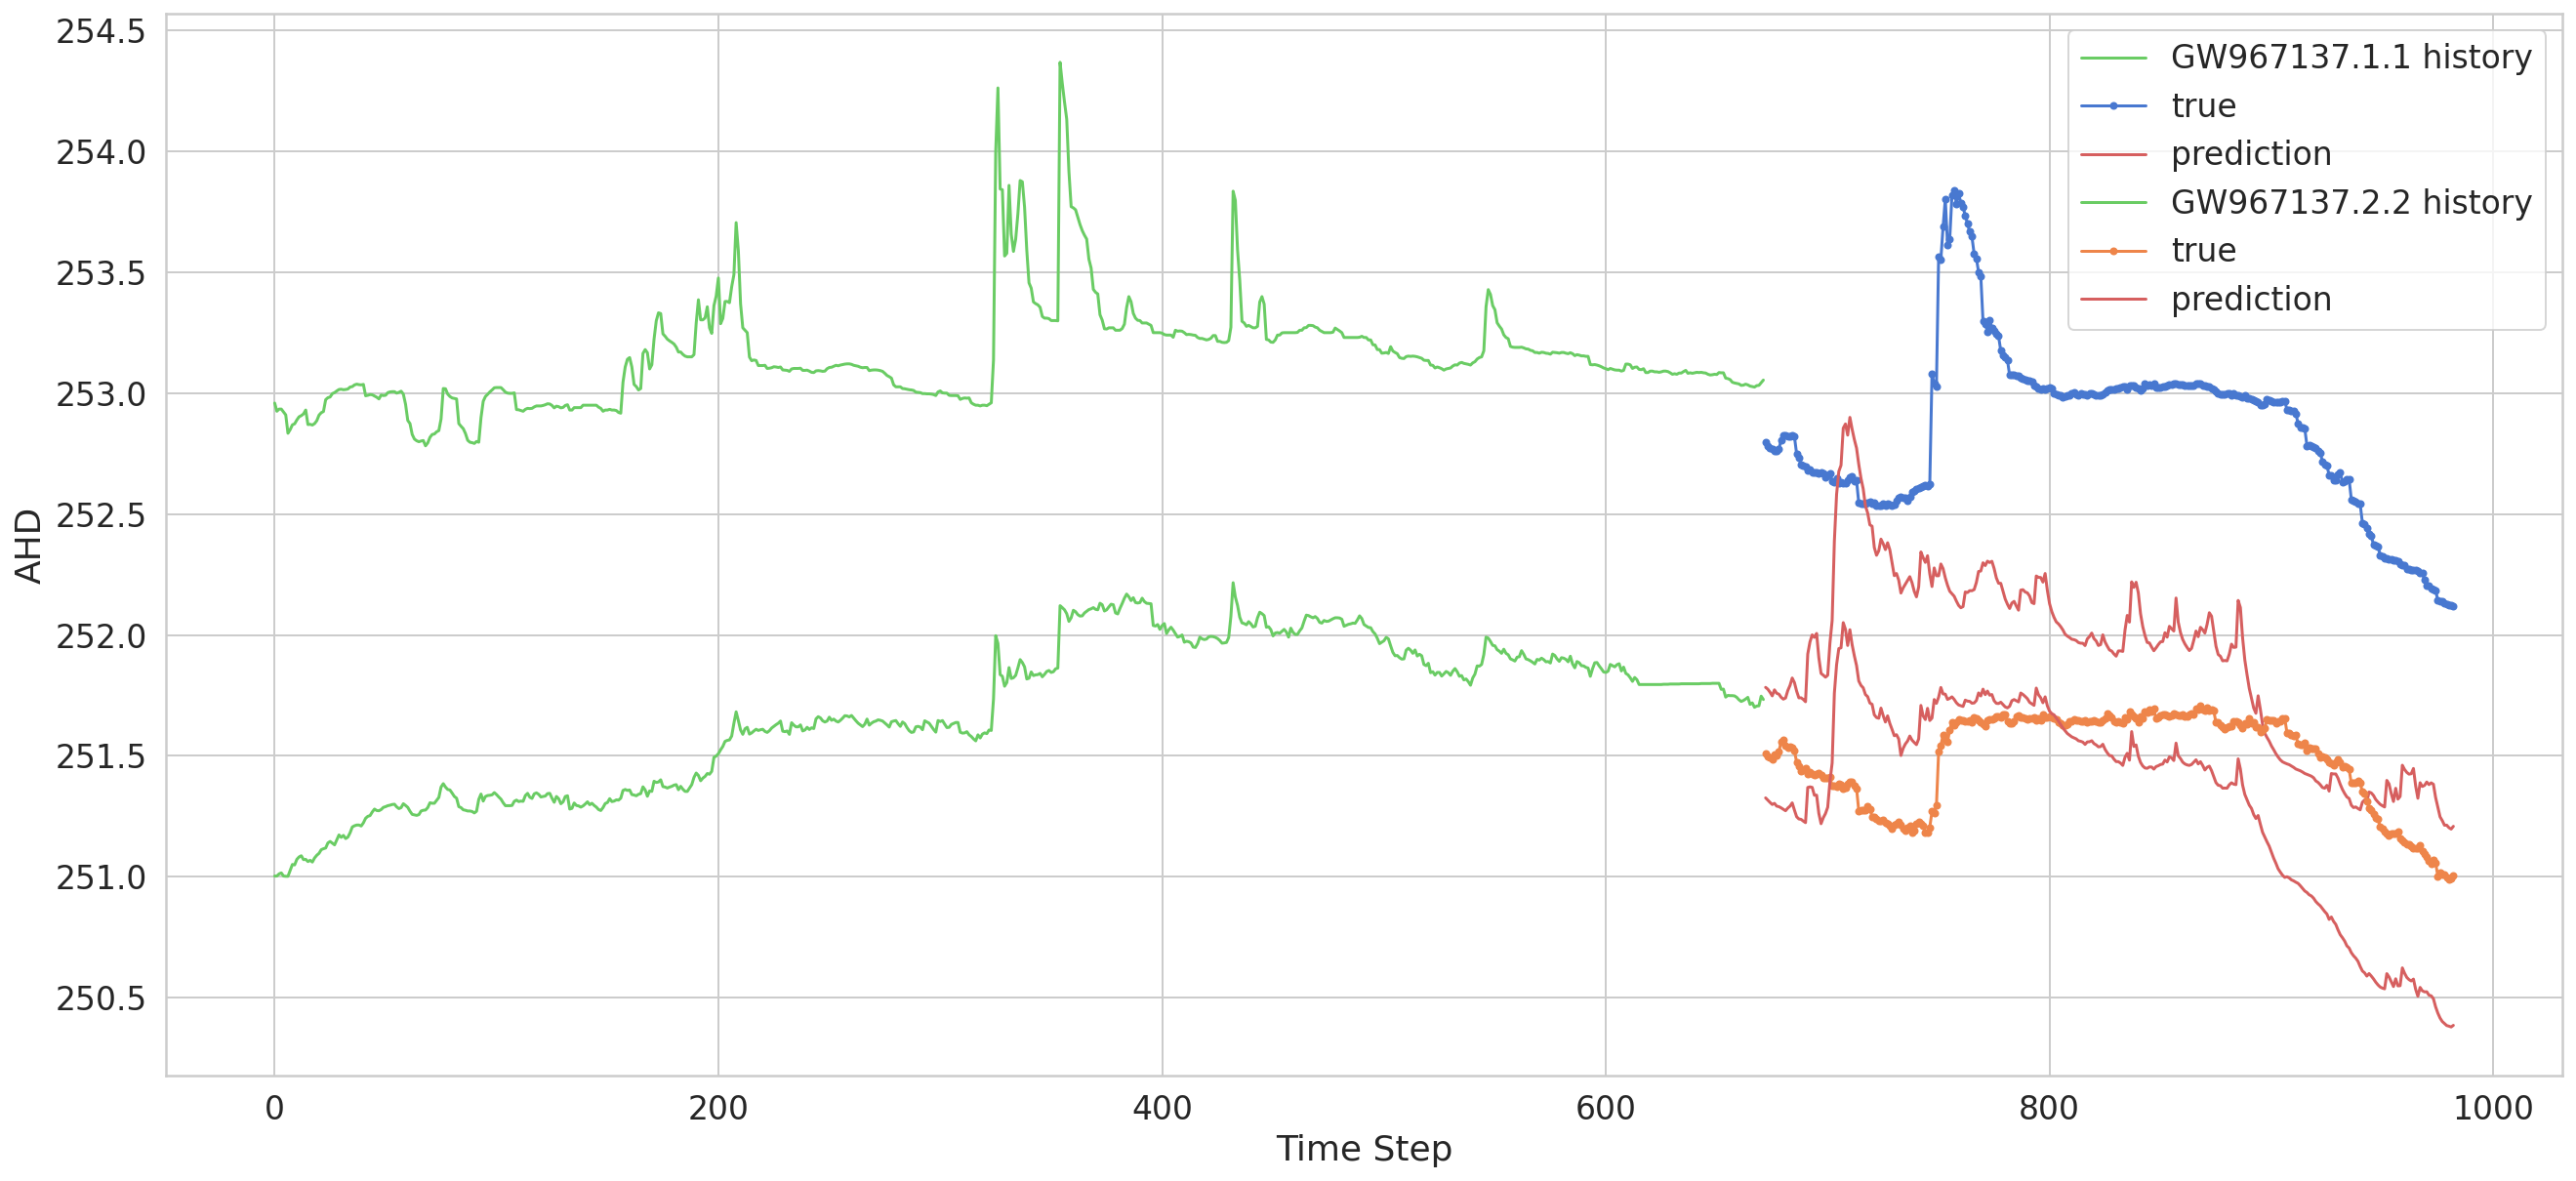

In [35]:
plt.plot(np.arange(0, len(Y_train)), Ys_train[:,1].flatten(), 'g', label="GW967137.1.1 history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Ys_test[:,1].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred_inv[:,1].flatten(), 'r', label="prediction")

plt.plot(np.arange(0, len(Y_train)), Ys_train[:,2].flatten(), 'g', label="GW967137.2.2 history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Ys_test[:,2].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred_inv[:,2].flatten(), 'r', label="prediction")
plt.ylabel('AHD')
plt.xlabel('Time Step')
plt.legend()
plt.show();

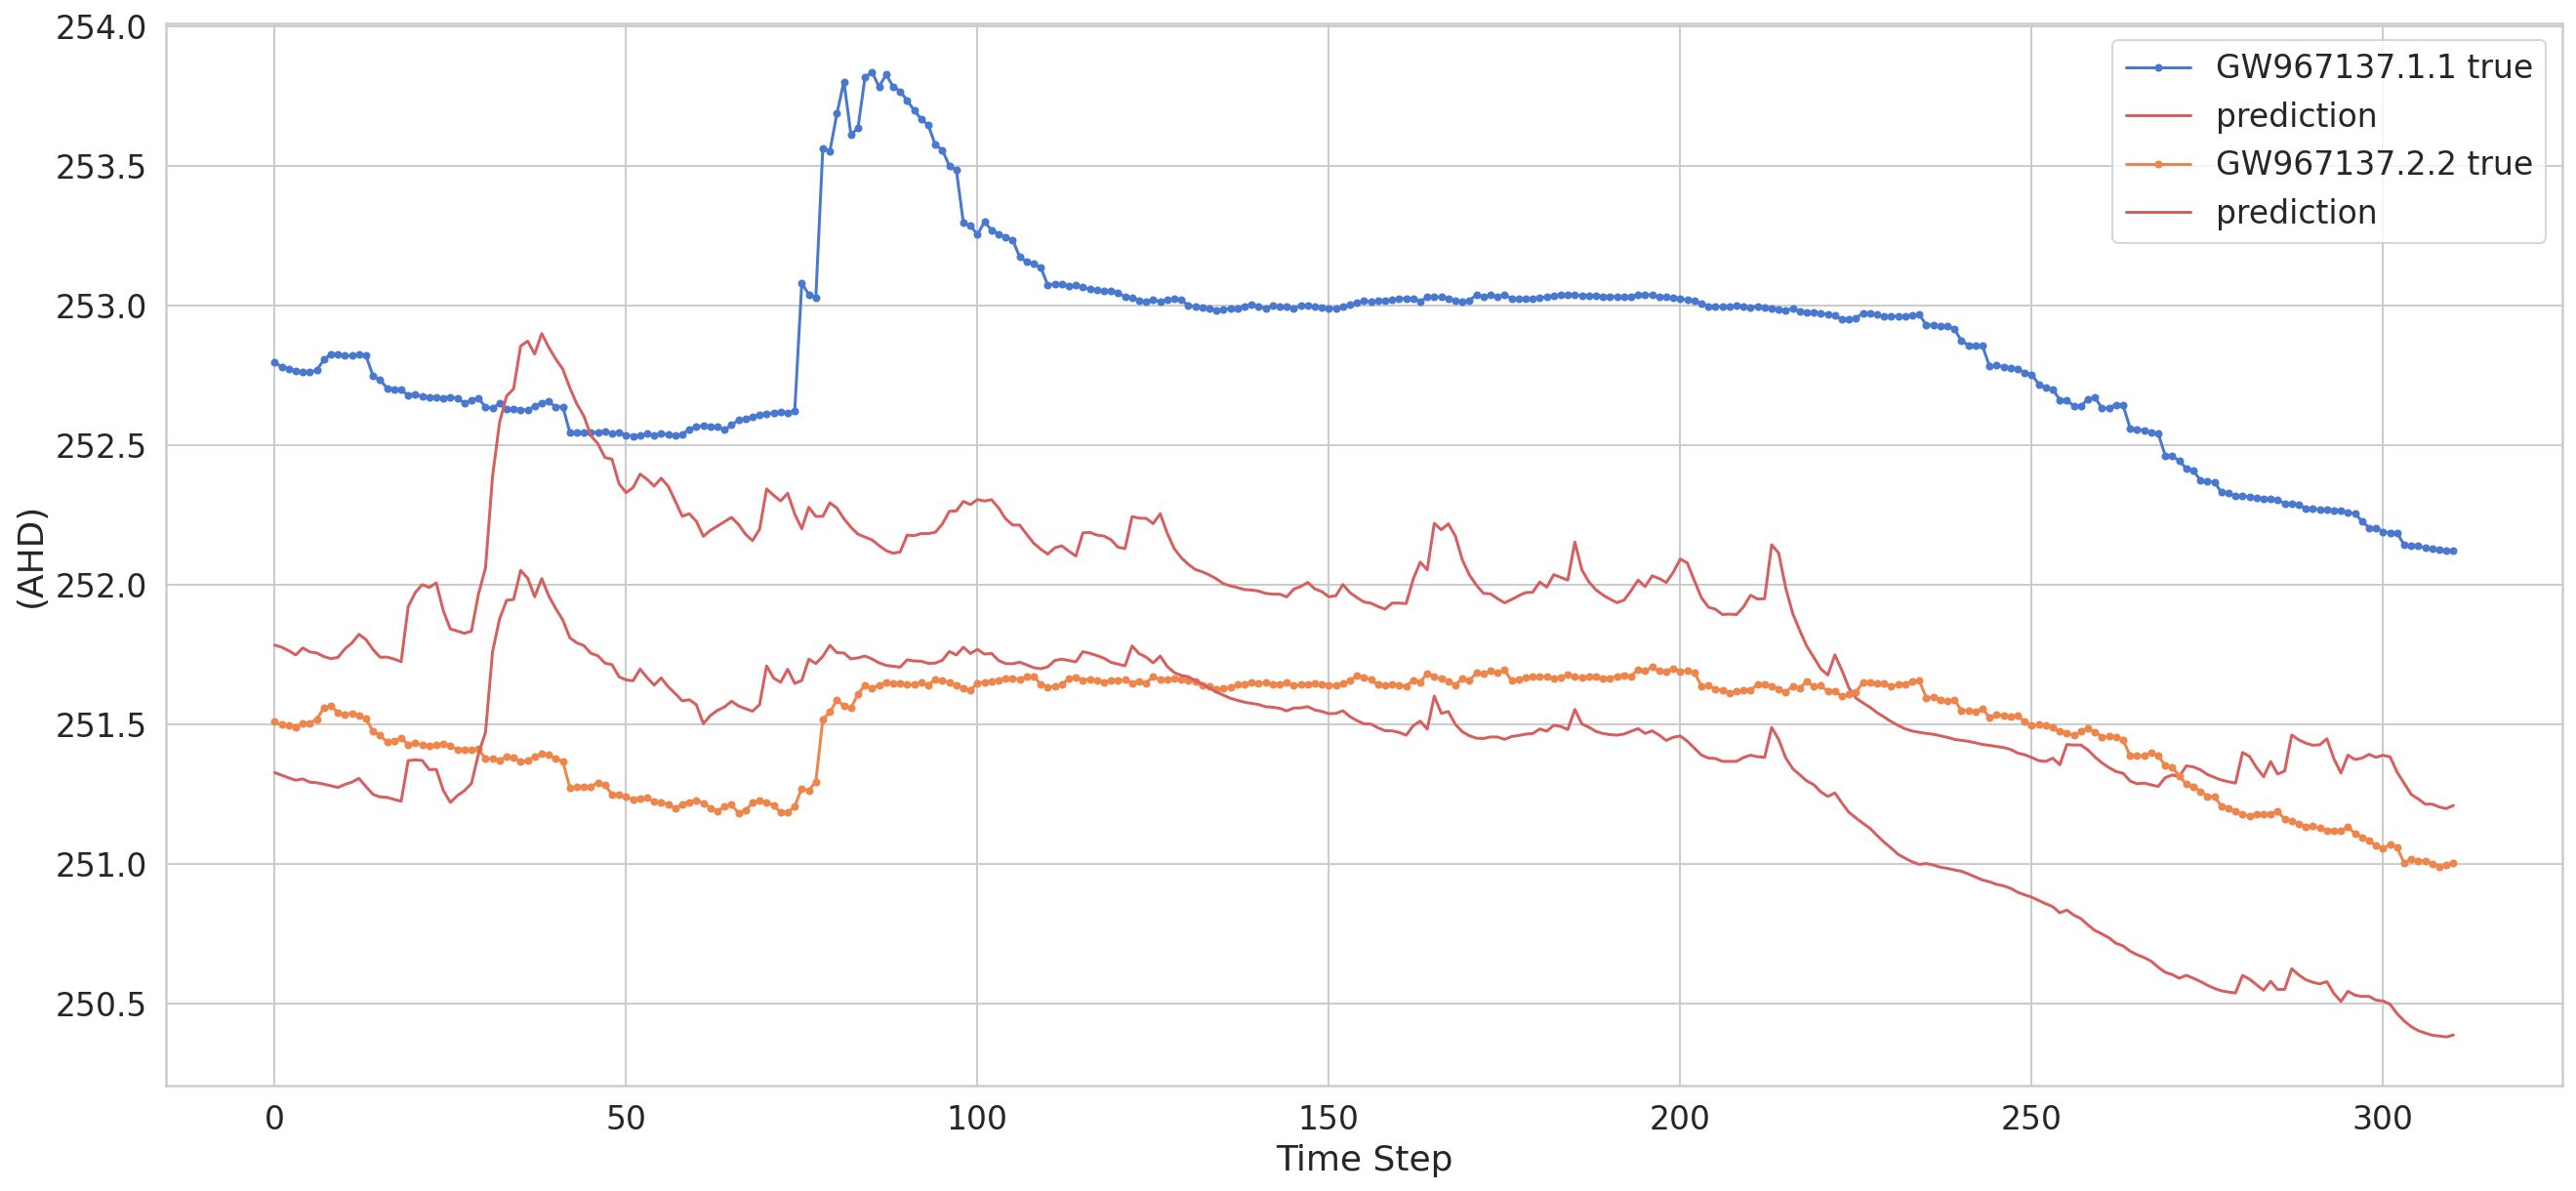

In [36]:
plt.plot(Ys_test[:,1].flatten(), marker='.', label="GW967137.1.1 true")
plt.plot(Y_pred_inv[:,1].flatten(), 'r', label="prediction")
plt.plot(Ys_test[:,2].flatten(), marker='.', label="GW967137.2.2 true")
plt.plot(Y_pred_inv[:,2].flatten(), 'r', label="prediction")
plt.ylabel('(AHD)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# Modelled Data

In [37]:
Y_pred = model.predict(X_model)

10/10 [==============================] - 0s 9ms/step


In [38]:
Y_model_pred_inv = scaler.inverse_transform(Y_pred)


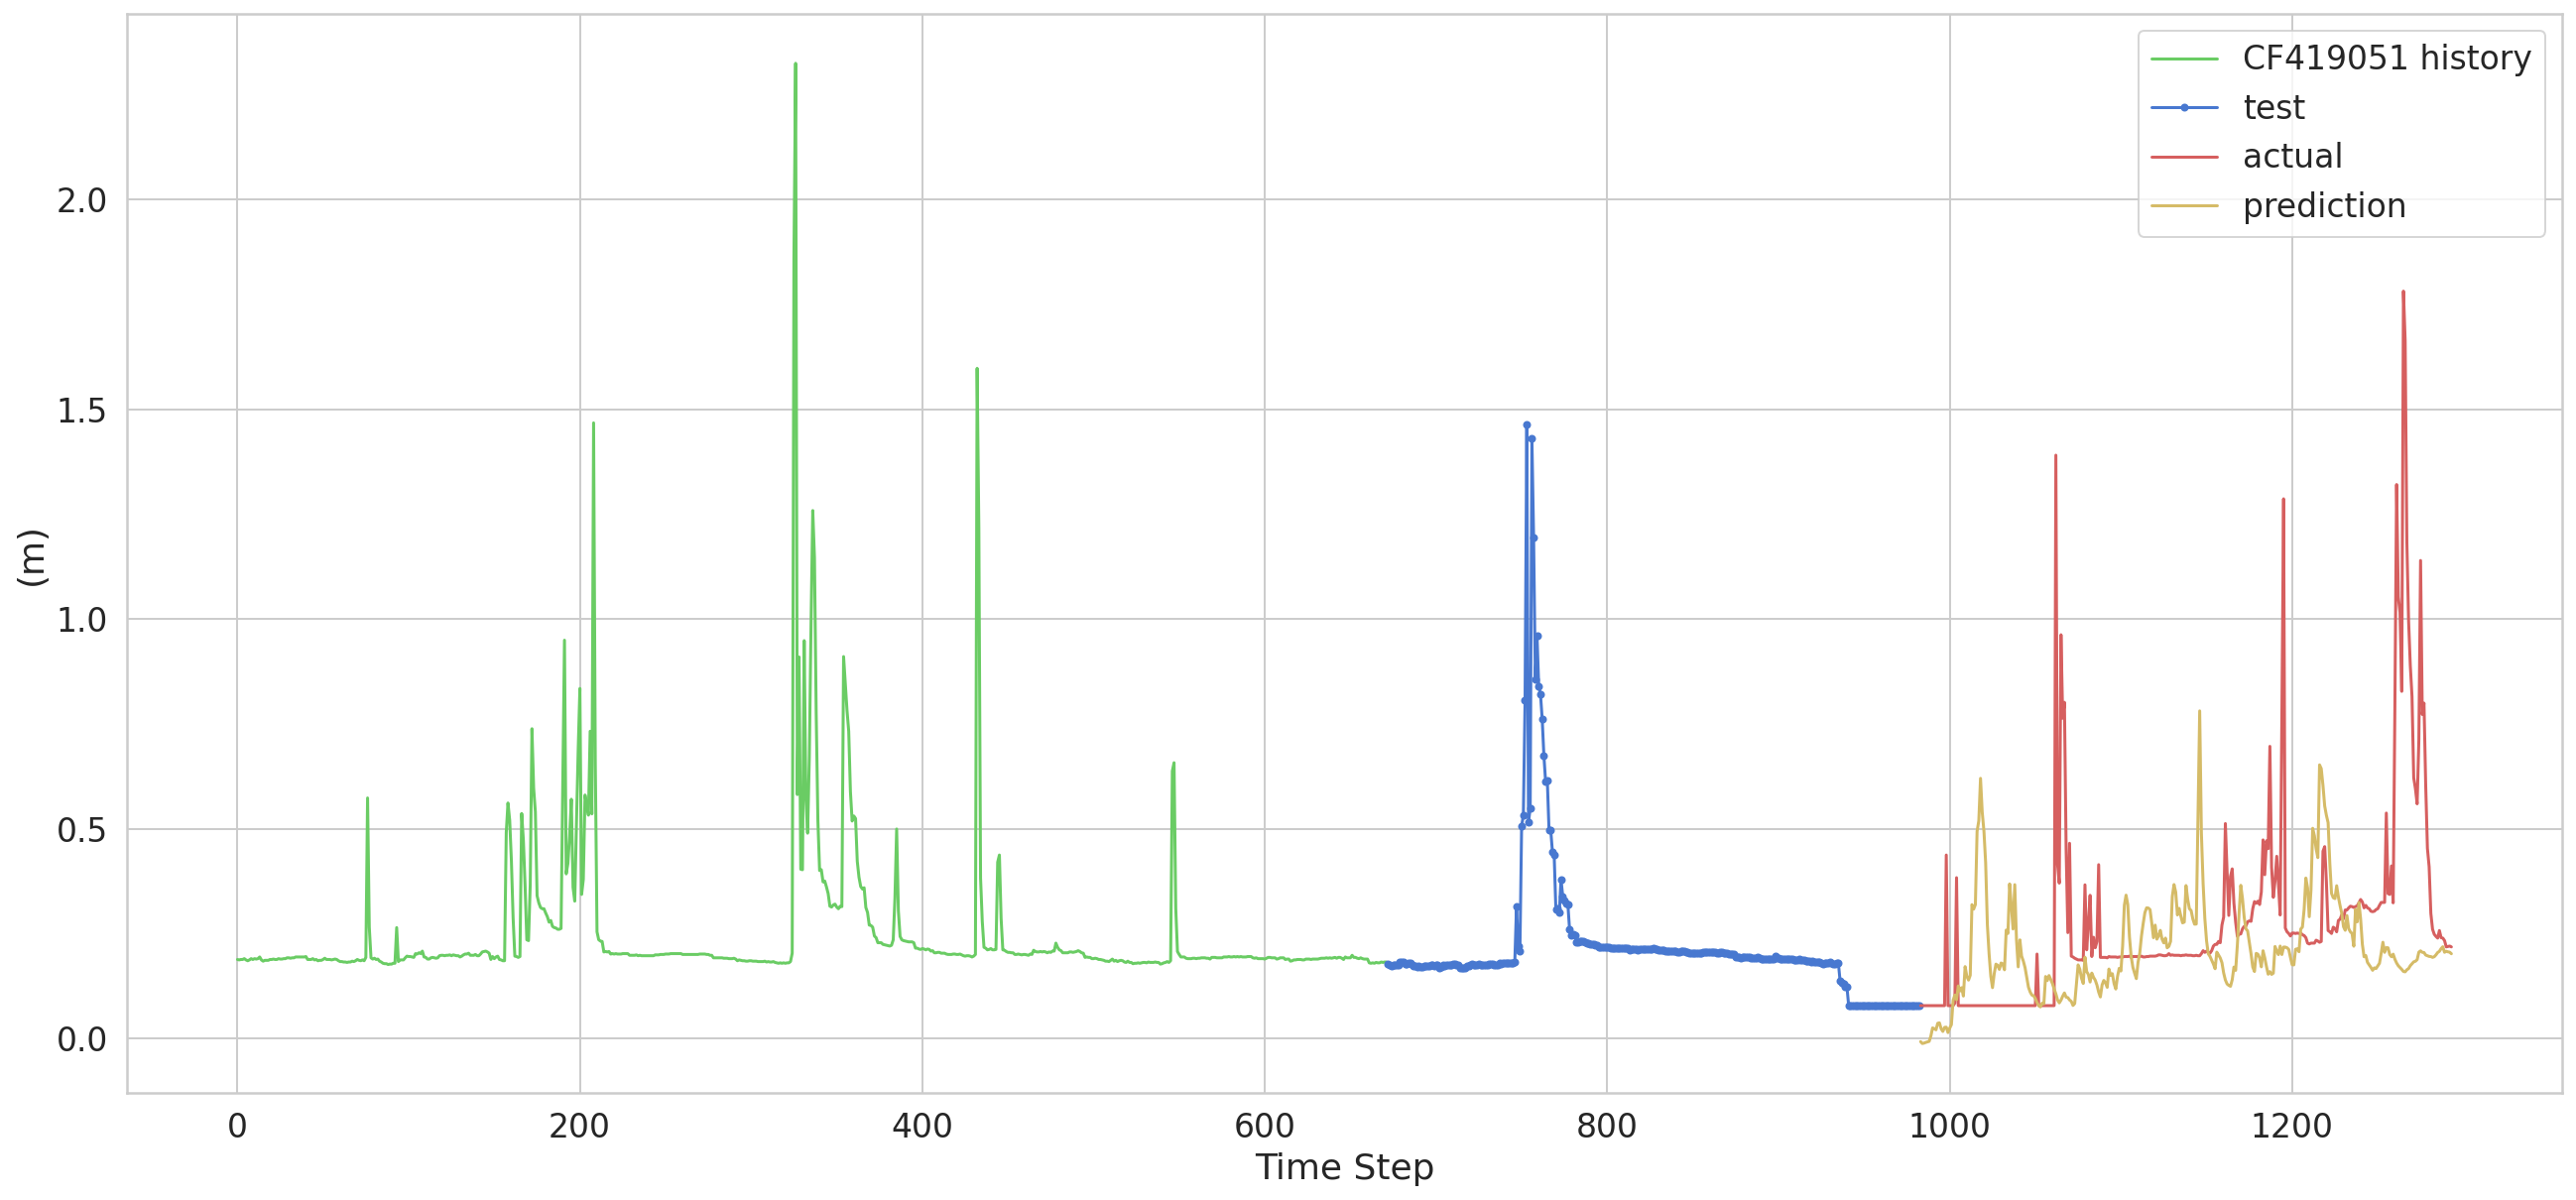

In [39]:
plt.plot(np.arange(0, len(Y_train)), Ys_train[:,0].flatten(), 'g', label="419051 history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Ys_test[:,0].flatten(), marker='.', label="test")
plt.plot(np.arange(len(Y_train)  + len(Y_test), len(Y_train) + len(Y_test) + len(Ys_model)), Ys_model[:,0].flatten(), 'r', label="actual")
plt.plot(np.arange(len(Y_train) + len(Y_test), len(Y_train) + len(Y_test) + len(Y_model)), Y_model_pred_inv[:,0].flatten(), 'y', label="prediction")


plt.ylabel('(m)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

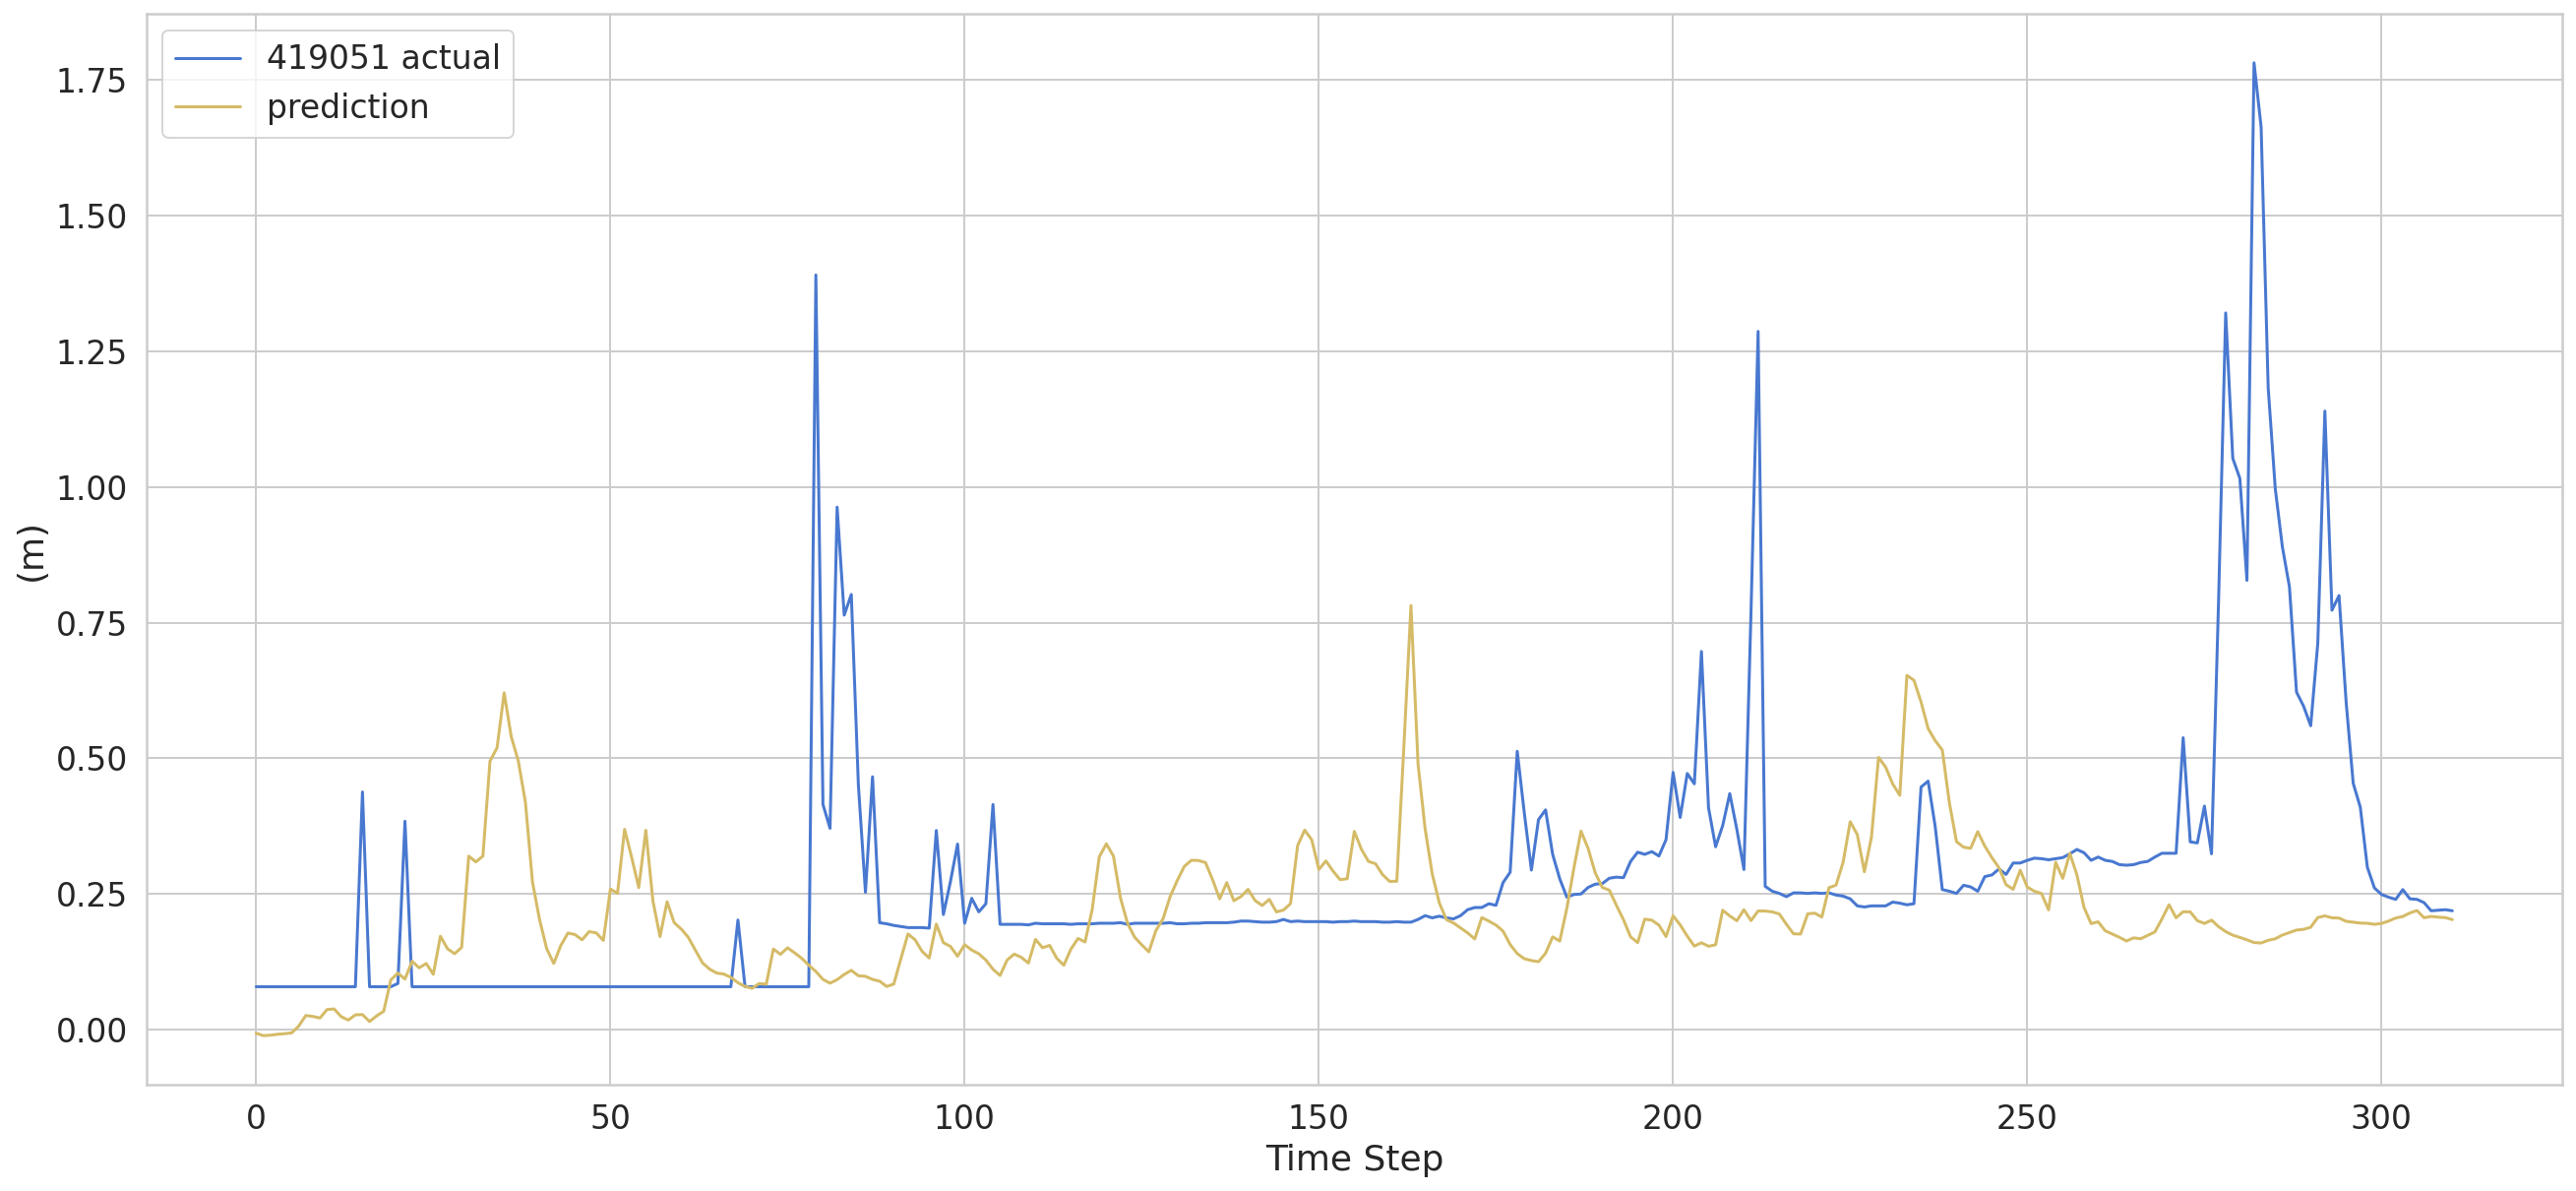

In [40]:
plt.plot(Ys_model[:,0].flatten(), label="419051 actual")
plt.plot(Y_model_pred_inv[:,0].flatten(), 'y', label="prediction")
plt.ylabel('(m)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

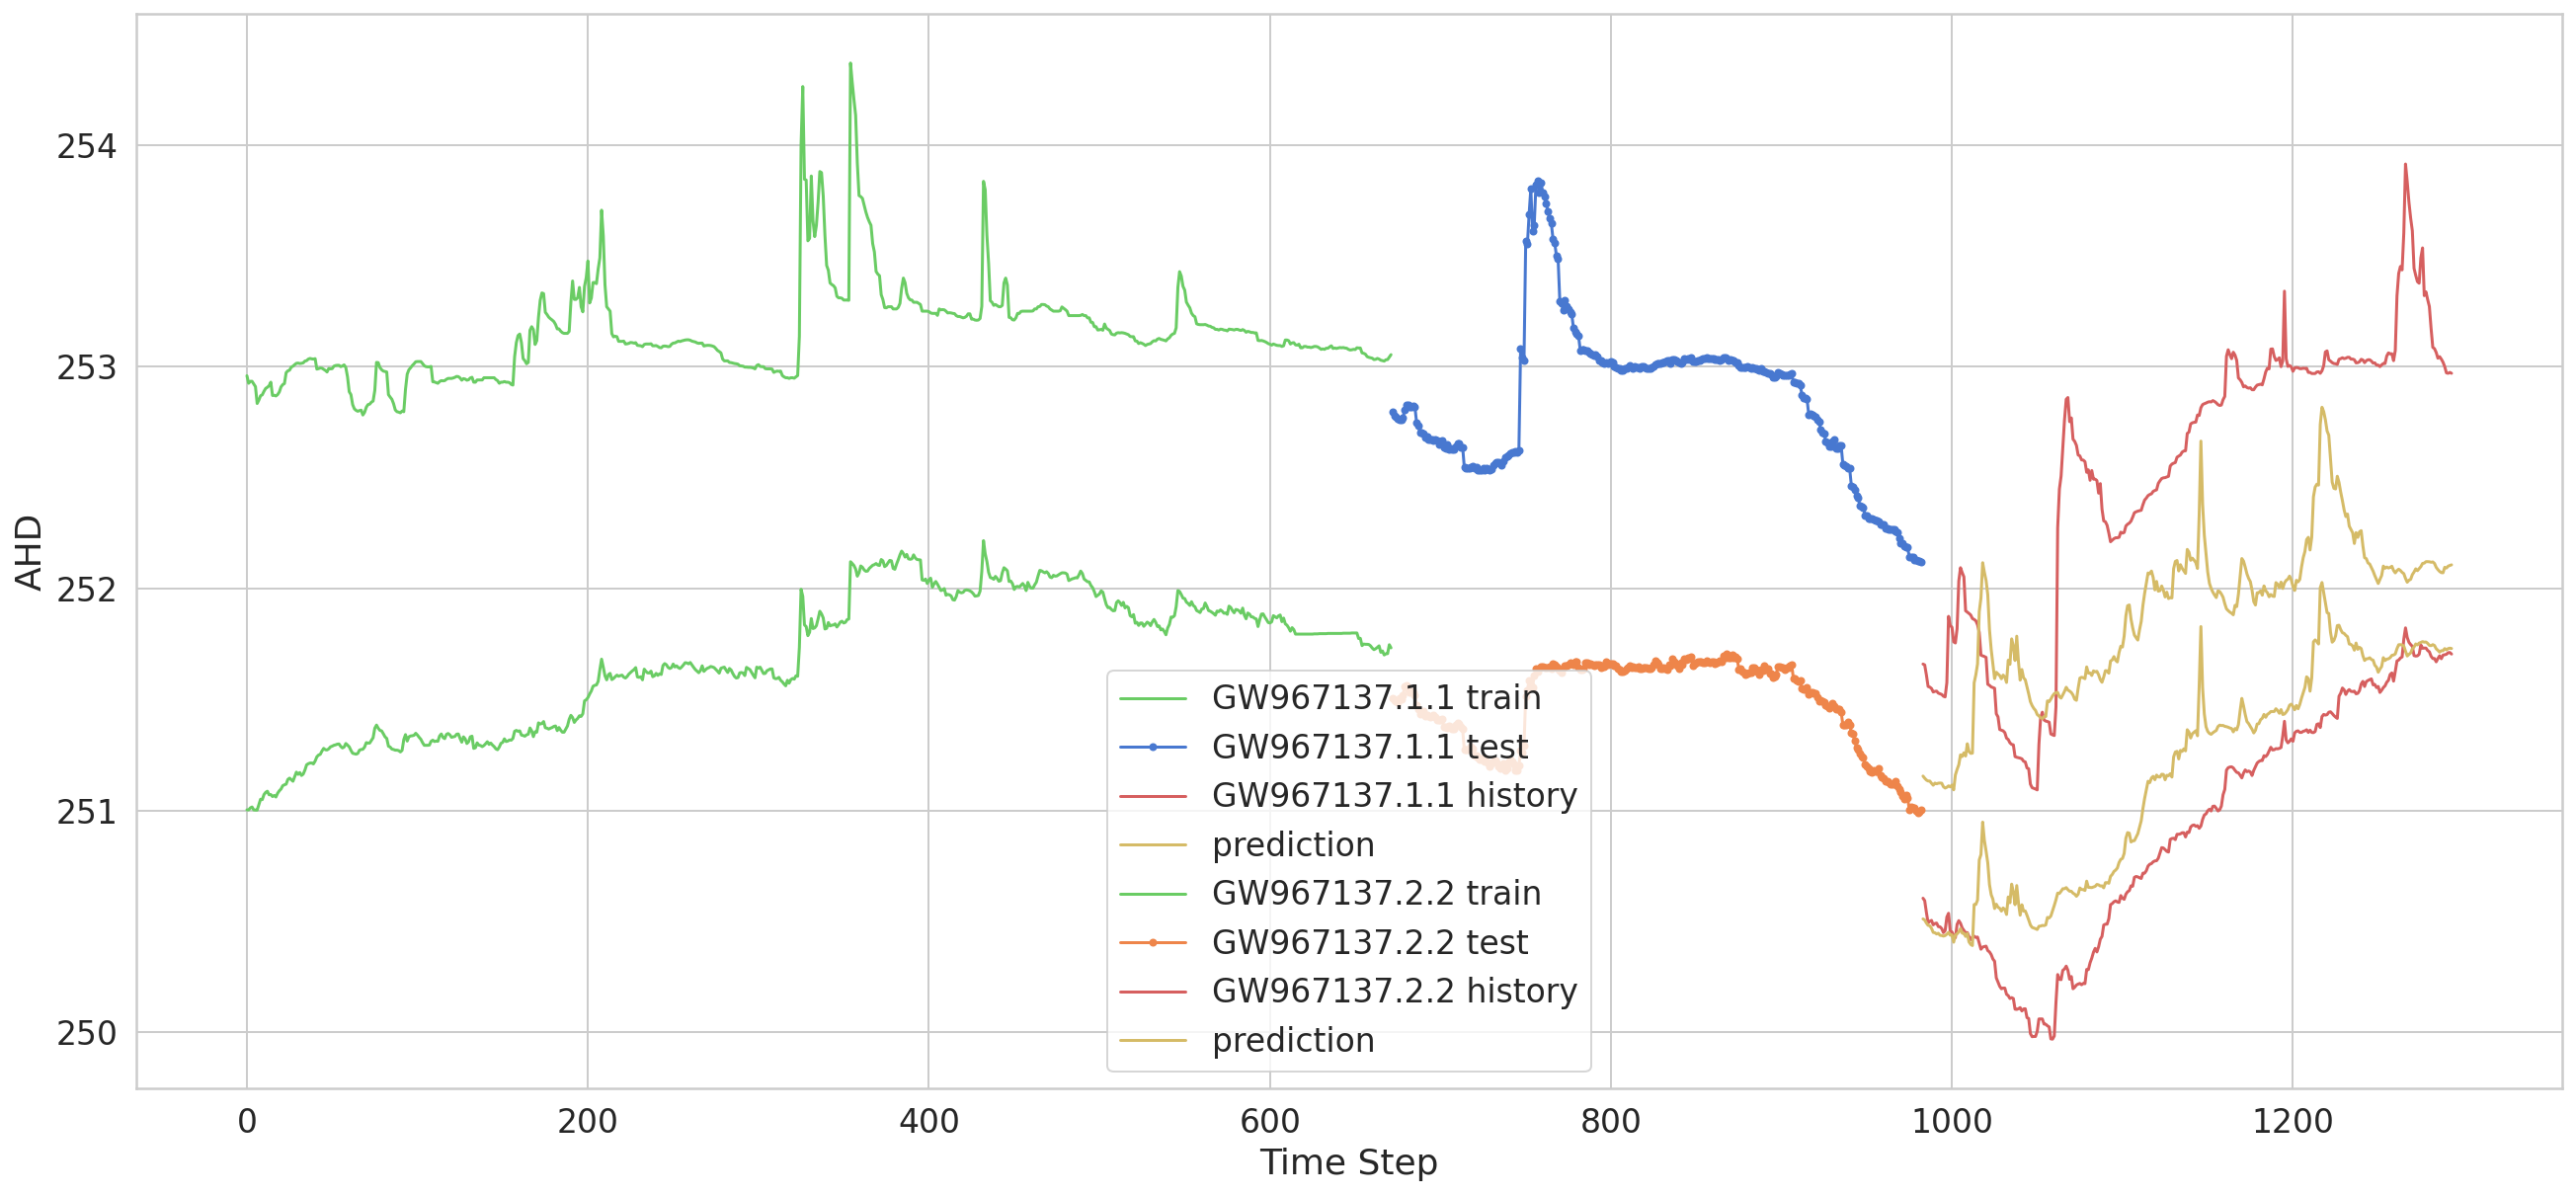

In [41]:
plt.plot(np.arange(0, len(Y_train)), Ys_train[:,1].flatten(), 'g', label="GW967137.1.1 train")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Ys_test[:,1].flatten(), marker='.', label="GW967137.1.1 test")
plt.plot(np.arange(len(Y_train) + len(Y_test), len(Y_train) + len(Y_test) + len(Y_model)), Ys_model[:,1].flatten(), 'r', label="GW967137.1.1 history")
plt.plot(np.arange(len(Y_train) + len(Y_test), len(Y_train) + len(Y_test) + len(Y_model)), Y_model_pred_inv[:,1].flatten(), 'y', label="prediction")

plt.plot(np.arange(0, len(Y_train)), Ys_train[:,2].flatten(), 'g', label="GW967137.2.2 train")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Ys_test[:,2].flatten(), marker='.', label="GW967137.2.2 test")
plt.plot(np.arange(len(Y_train) + len(Y_test), len(Y_train) + len(Y_test) + len(Y_model)), Ys_model[:,2].flatten(), 'r', label="GW967137.2.2 history")
plt.plot(np.arange(len(Y_train) + len(Y_test), len(Y_train) + len(Y_test) + len(Y_model)), Y_model_pred_inv[:,2].flatten(), 'y', label="prediction")

plt.ylabel('AHD')
plt.xlabel('Time Step')
plt.legend()
plt.show();

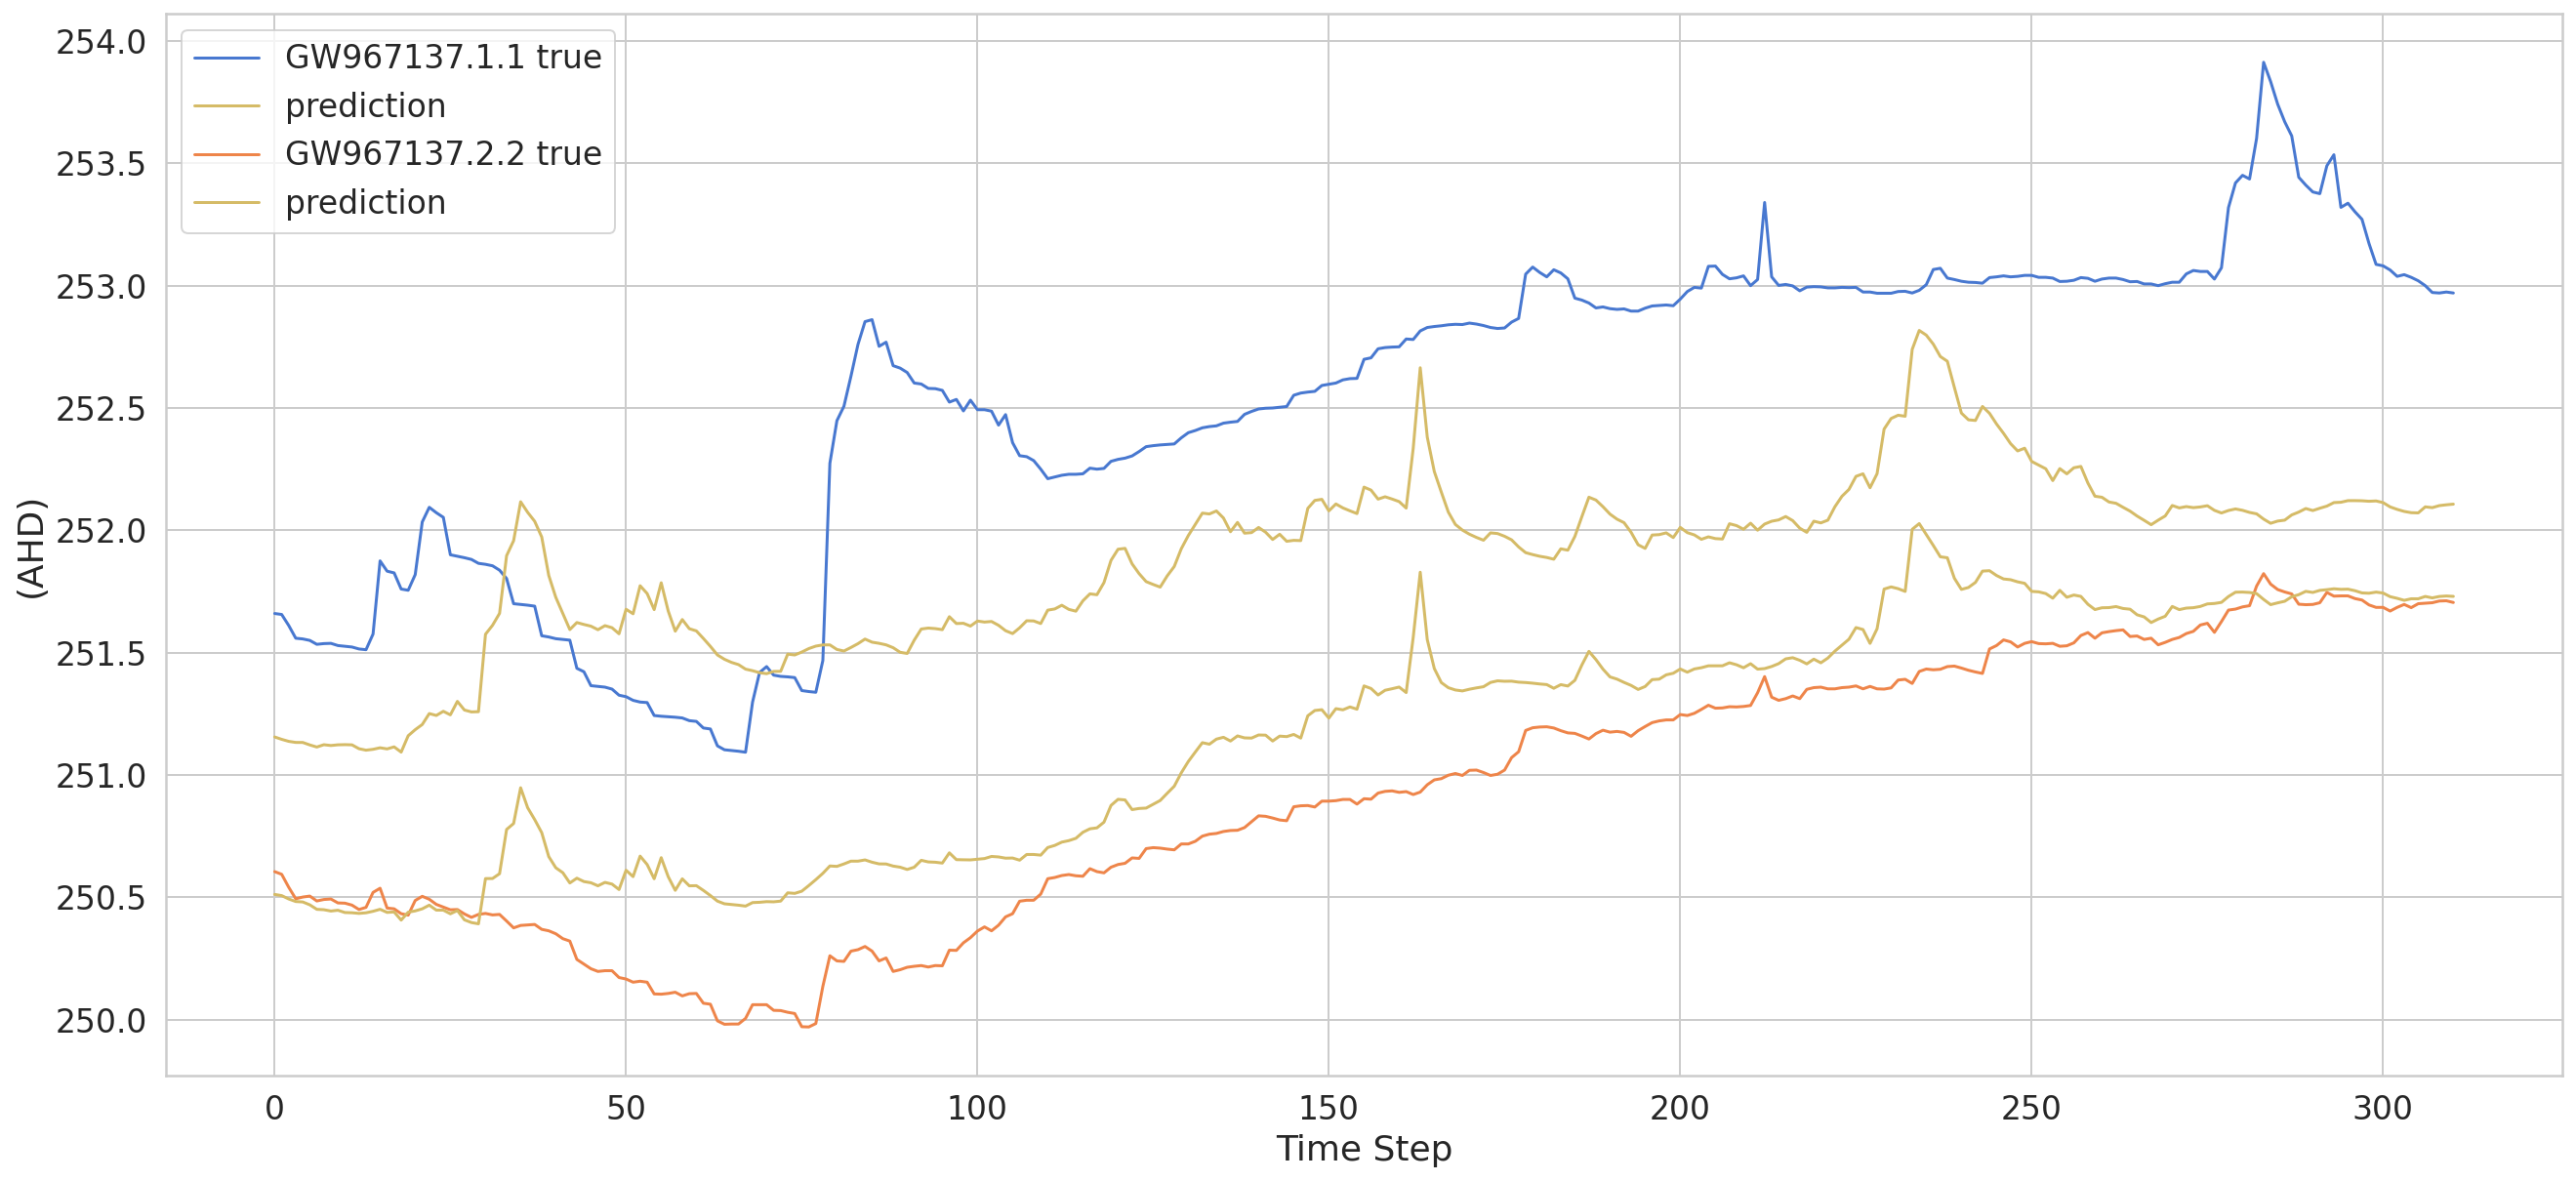

In [42]:

plt.plot(Ys_model[:,1].flatten(), label="GW967137.1.1 true")
plt.plot(Y_model_pred_inv[:,1].flatten(), 'y', label="prediction")

plt.plot(Ys_model[:,2].flatten(), label="GW967137.2.2 true")
plt.plot(Y_model_pred_inv[:,2].flatten(), 'y', label="prediction")

plt.ylabel('(AHD)')
plt.xlabel('Time Step')
plt.legend()
plt.show();